# Problem Statement 

#### About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

#### How can you help here?

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

## Basic data cleaning and exploration

## Build some features to prepare the data for actual analysis. Extract features from the below fields
 
## In-depth analysis and feature engineering by performing hypothesis testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, kstest, ks_2samp
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [2]:
df = pd.read_csv("delhivery_data.csv")
pd.set_option('display.max_columns', None)

df.sample(15)

data          trip_creation_time  \
105232  training  2018-09-18 05:07:01.943216   
34158   training  2018-09-22 20:05:13.283666   
65919   training  2018-09-20 19:21:03.903465   
51666   training  2018-09-26 15:25:57.580215   
21844   training  2018-09-19 19:57:39.116639   
58281   training  2018-09-23 02:10:37.098838   
15      training  2018-09-14 15:42:46.437249   
99170   training  2018-09-25 21:49:46.177837   
11845   training  2018-09-12 21:26:09.995701   
1856    training  2018-09-23 19:39:14.590326   
70742       test  2018-09-30 00:56:13.002206   
101716      test  2018-09-27 23:31:27.330230   
70169   training  2018-09-26 04:05:09.143938   
88696       test  2018-10-01 08:08:19.050719   
3418    training  2018-09-25 17:56:04.920379   

                                      route_schedule_uuid route_type  \
105232  thanos::sroute:32180ade-42b5-4d78-b6aa-14233b5...        FTL   
34158   thanos::sroute:9da2d540-f140-48b9-8c93-ea59aa4...        FTL   
65919   thanos::sroute:69633991-6513-4476-9b36-99f82c3...        FTL   
51666   thanos::sroute:a107c6bb-941e-4fa9-89d6-6130697...    Carting   
21844   thanos::sroute:cf807aa5-16c1-4b6c-8810-470deb9...    Carting   
58281   thanos::sroute:951d77aa-4725-4c4e-882d-42acc35...        FTL   
15      thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...    Carting   
99170   thanos::sroute:05c1c3a2-b159-49cc-89ae-bcce3d1...        FTL   
11845   thanos::sroute:981e3306-1209-469c-87ab-3c7c827...        FTL   
1856    thanos::sroute:85582793-a37e-4faf-820a-ae6cf4a...        FTL   
70742   thanos::sroute:fb308c0f-ea3a-48ef-a6c3-4776341...        FTL   
101716  thanos::sroute:c446b063-ccbc-453b-9f94-0697e8c...        FTL   
70169   thanos::sroute:e001e3f7-17c4-4d4c-9a42-0f4476b...    Carting   
88696   thanos::sroute:7c115632-8e81-4330-904a-9c7a6d6...        FTL   
3418    thanos::sroute:0456b740-1dad-4929-bbe0-87d8843...        FTL   

                      trip_uuid source_center  \
105232  trip-153724722194279132  IND781018AAB   
34158   trip-153764671328343946  IND842001AAA   
65919   trip-153747126390309390  IND421302AAG   
51666   trip-153797555757996701  IND421302AAG   
21844   trip-153738705911621778  IND000000AEL   
58281   trip-153766863709860719  IND421302AAG   
15      trip-153693976643699843  IND400011AAA   
99170   trip-153791218617758646  IND403726AAA   
11845   trip-153678756999546218  IND341505AAA   
1856    trip-153773155458993967  IND302014AAA   
70742   trip-153826897300192971  IND462022AAA   
101716  trip-153809108732997394  IND484001AAA   
70169   trip-153793470914368774  IND501359AAE   
88696   trip-153838129905048031  IND151001AAA   
3418    trip-153789816492012020  IND000000ACB   

                                source_name destination_center  \
105232                 Guwahati_Hub (Assam)       IND785001AAA   
34158           Muzaffrpur_Bbganj_I (Bihar)       IND847212AAA   
65919     Bhiwandi_Mankoli_HB (Maharashtra)       IND444005AAB   
51666     Bhiwandi_Mankoli_HB (Maharashtra)       IND401104AAA   
21844              Delhi_PunjabiB_L (Delhi)       IND000000ACB   
58281     Bhiwandi_Mankoli_HB (Maharashtra)       IND000000ACB   
15              LowerParel_CP (Maharashtra)       IND400072AAD   
99170                         Goa_Hub (Goa)       IND581303AAA   
11845        Makrana_Mwalibad_D (Rajasthan)       IND341503AAB   
1856                 Jaipur_Hub (Rajasthan)       IND313001AAB   
70742    Bhopal_Trnsport_H (Madhya Pradesh)       IND209304AAA   
101716  Shahdol_Sohagpur_D (Madhya Pradesh)       IND484446AAA   
70169      Hyderabad_Shamshbd_H (Telangana)       IND500010AAB   
88696                 Bhatinda_DPC (Punjab)       IND160002AAC   
3418          Gurgaon_Bilaspur_HB (Haryana)       IND562132AAA   

                          destination_name               od_start_time  \
105232           Jorhat_RicMilRd_D (Assam)  2018-09-18 05:07:01.943216   
34158         Madhubani_Bardivan_D (Bihar)  2018-09-22 20:05:13.283666   
65919       Akola_Gaurkshn

## Column Description:

1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique Id for a particular route schedule
4. route_type – Transportation type
- FTL: Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- Carting: Handling system consisting of small vehicles (carts)
5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente – Destination ID
9. destination_name – Destination Name
10. od_start_time – Trip start time-
11. od_end_time – Trip end time
12. start_scan_to_end_scan – Time taken to deliver from source to destination
13. is_cutoff – Unknown field
14. cutoff_factor – Unknown field
15. cutoff_timestamp – Unknown field
16. actual_distance_to_destination – Distance in Kms between source and destination warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
18. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
19. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
20. factor – Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
24. segment_factor – Unknown field

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [4]:
def unique_value_check_for_each_col(df):
    col_unique_val = dict()
    for col in df.columns:
        if df[col].dtypes=='object':
            col_unique_val.update({col: df[col].nunique()})
    return col_unique_val

unique_value_check_for_each_col(df)

{'data': 2,
 'trip_creation_time': 14817,
 'route_schedule_uuid': 1504,
 'route_type': 2,
 'trip_uuid': 14817,
 'source_center': 1508,
 'source_name': 1498,
 'destination_center': 1481,
 'destination_name': 1468,
 'od_start_time': 26369,
 'od_end_time': 26369,
 'cutoff_timestamp': 93180}

In [5]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [6]:
df.shape

(144867, 24)

In [7]:
print(f"% of null values in source_name column: {(293/df.shape[0])*100}")
print(f"% of null values in destination_name column: {(261/df.shape[0])*100}")


% of null values in source_name column: 0.20225448169700483
% of null values in destination_name column: 0.1801652550270248


### Since the % of missing value is less than 1% we can drop them.

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(144316, 24)

In [11]:
def categorical_feature(cols):
    cat_col = []
    for col in cols:
        if len(df[col].unique())<6:
            cat_col.append(col)
    return cat_col
cat_col = categorical_feature(cols=df.columns)

cat_col

['data', 'route_type', 'is_cutoff']

In [12]:
def categorical_feature_visual(cat_col):
    plt.figure(figsize=(12,10))
    for i in range(len(cat_col)):
        plt.subplot(2, 2, i+1)
        sns.countplot(data=df, x=cat_col[i])
        
    plt.tight_layout()
    plt.show()
        

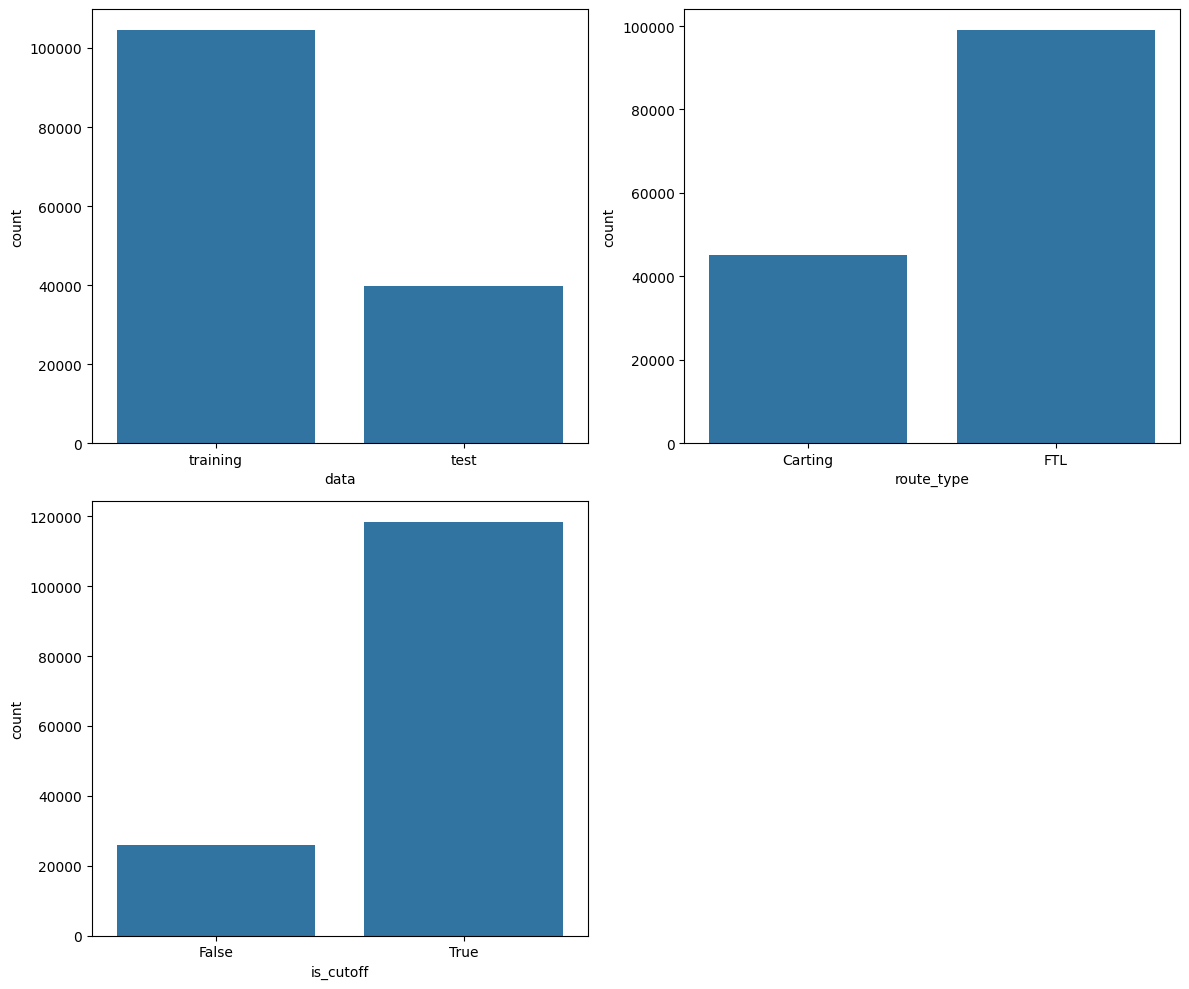

In [13]:
categorical_feature_visual(cat_col=cat_col)

In [14]:
col_to_change = ['od_start_time', 'od_end_time', 'cutoff_timestamp', 'trip_creation_time']

def to_change(col_to_change):
    for col in col_to_change:
        df[col] = pd.to_datetime(df[col], errors='coerce')

to_change(col_to_change)       

In [15]:
df[['od_start_time', 'od_end_time', 'cutoff_timestamp', 'trip_creation_time', 'actual_distance_to_destination']].sample(10)

od_start_time                od_end_time  \
13085  2018-09-16 14:59:30.556504 2018-09-17 00:10:58.269854   
30472  2018-10-01 03:09:21.346674 2018-10-01 06:50:21.764059   
34672  2018-09-27 07:48:46.321261 2018-09-27 10:48:45.816137   
4631   2018-09-24 23:48:27.458038 2018-09-26 19:29:50.265309   
92391  2018-09-15 02:46:18.759915 2018-09-15 03:24:19.338129   
68952  2018-09-24 02:02:31.626257 2018-09-25 01:29:45.162335   
45370  2018-09-25 20:26:08.325304 2018-09-26 00:40:20.786424   
120644 2018-09-26 16:05:31.267440 2018-09-28 01:54:50.522462   
4987   2018-09-17 15:08:33.585551 2018-09-18 03:08:46.707621   
109469 2018-09-30 05:10:46.746769 2018-09-30 10:02:22.037174   

          cutoff_timestamp         trip_creation_time  \
13085  2018-09-16 21:05:18 2018-09-16 14:59:30.556504   
30472  2018-10-01 03:17:54 2018-10-01 03:09:21.346674   
34672  2018-09-27 08:59:54 2018-09-27 01:01:41.534663   
4631   2018-09-25 08:40:55 2018-09-24 23:48:27.458038   
92391  2018-09-15 02:55:21 2018-09-14 23:36:50.771430   
68952  2018-09-24 13:56:17 2018-09-24 02:02:31.626257   
45370  2018-09-25 22:41:16 2018-09-25 20:26:08.325304   
120644 2018-09-27 05:59:21 2018-09-25 04:21:12.551117   
4987   2018-09-17 15:19:20 2018-09-17 03:18:31.933782   
109469 2018-09-30 05:50:31 2018-09-30 00:26:29.490569   

        actual_distance_to_destination  
13085                       111.977518  
30472                        37.155053  
34672                        63.586203  
4631                       1100.633205  
92391                        16.533542  
68952                       440.250595  
45370                        64.230777  
120644                      704.651792  
4987                        123.376897  
109469                       72.327724

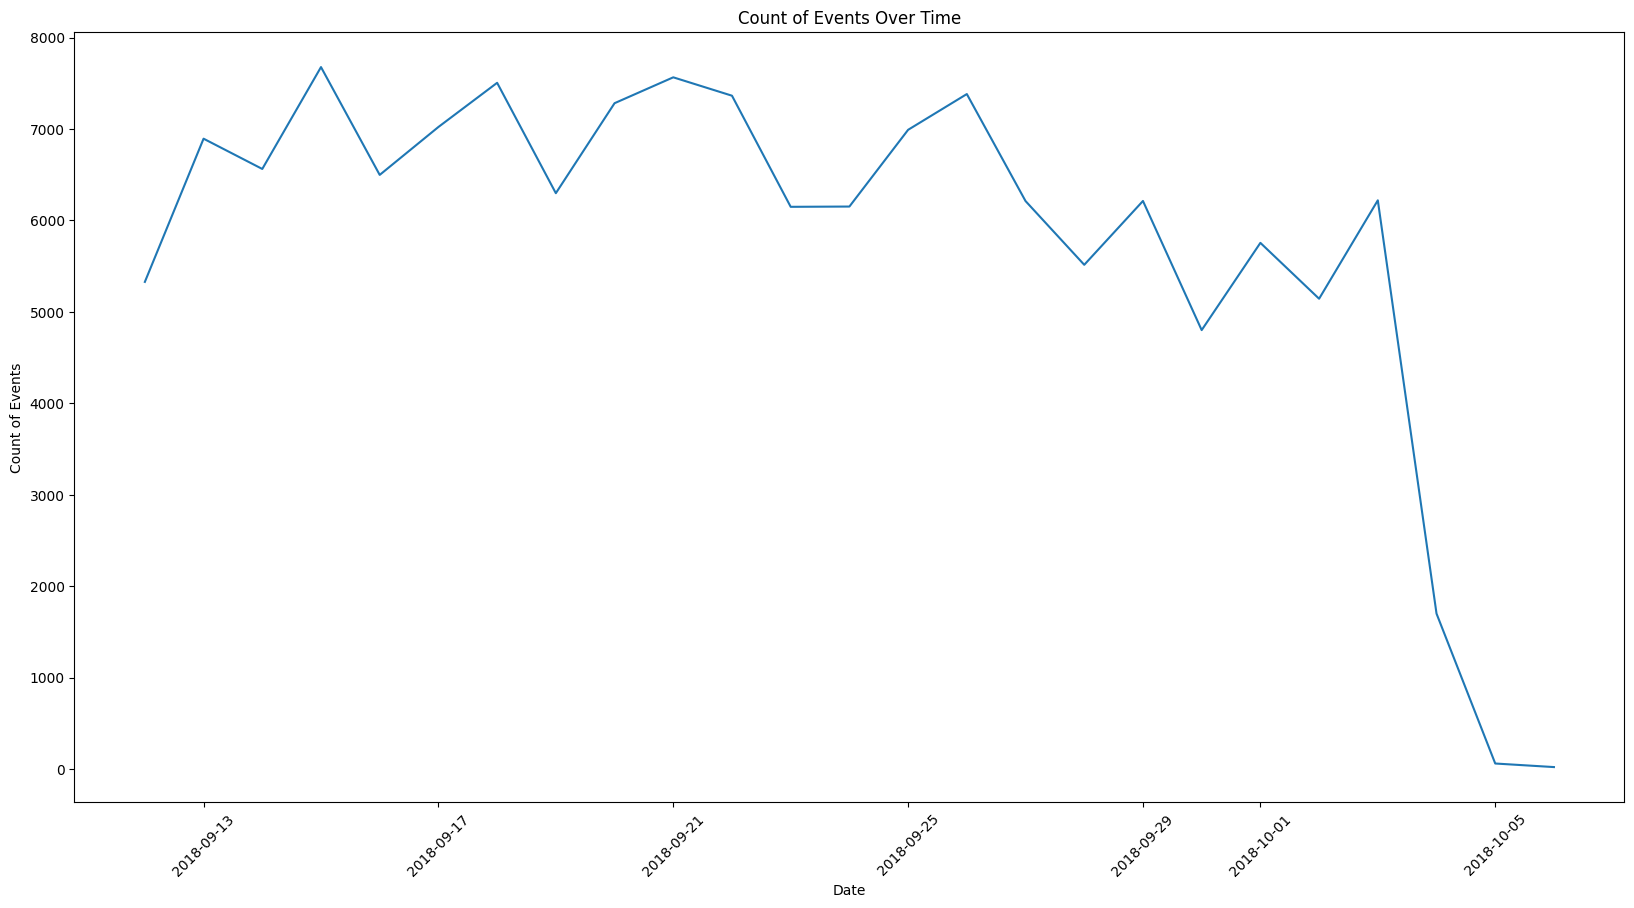

In [16]:
# Group by date and count the number of occurrences for each date
df['od_start_date'] = df['od_start_time'].dt.date
date_counts = df.groupby('od_start_date').size()

plt.figure(figsize=(20, 10))
sns.lineplot(x=date_counts.index, y=date_counts.values)  
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count of Events')
plt.title('Count of Events Over Time')
plt.show()

### Key Observations:

1. Initial Peak: The chart starts with a relatively high count of events around September 13, 2018.
2. Fluctuations: The number of events fluctuates over the subsequent weeks, with periods of increase and decrease.
3. Significant Drop: A sharp decline in the count of events occurs towards the end of October, reaching a low point around October 10, 2018.

### Potential Insights:

1. Seasonal Trends: If the data represents events related to a specific season or time of year, the fluctuations might reflect seasonal patterns.
2. Campaign or Promotional Effects: If there were any marketing campaigns or promotions during this period, their impact on event counts could be observed.
3. External Factors: External events or factors, such as holidays, economic conditions, or industry trends, could have influenced the event counts.
4. Data Quality Issues: It's important to consider potential data quality issues, such as missing data or errors in event recording, which might affect the observed trends.

### Finding Maximum and Minimum values for each numerical column

In [17]:
def min_max_value_in_each_numerical(df):
    minmax = dict()
    for col in df.columns:
        if df[col].dtypes=='float64' or df[col].dtypes=='int32':
            minmax.update({col : [df[col].min(), df[col].max()]})

    return minmax

min_max_value_in_each_numerical(df=df)

{'start_scan_to_end_scan': [20.0, 7898.0],
 'actual_distance_to_destination': [9.00004535977208, 1927.4477046975032],
 'actual_time': [9.0, 4532.0],
 'osrm_time': [6.0, 1686.0],
 'osrm_distance': [9.0082, 2326.1991000000003],
 'factor': [0.144, 77.38709677419355],
 'segment_actual_time': [-244.0, 3051.0],
 'segment_osrm_time': [0.0, 1611.0],
 'segment_osrm_distance': [0.0, 2191.4037000000003],
 'segment_factor': [-23.444444444444443, 574.25]}

### Creating categorical columns from numerical columns. 

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/608487060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[f"{col}_binned"], palette='viridis')
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/608487060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[f"{col}_binned"], palette='viridis')
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/608487060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[f"{col}_binned"], palette='viridis')
/var/folders/4m/vrm5g1l51xn5x3b

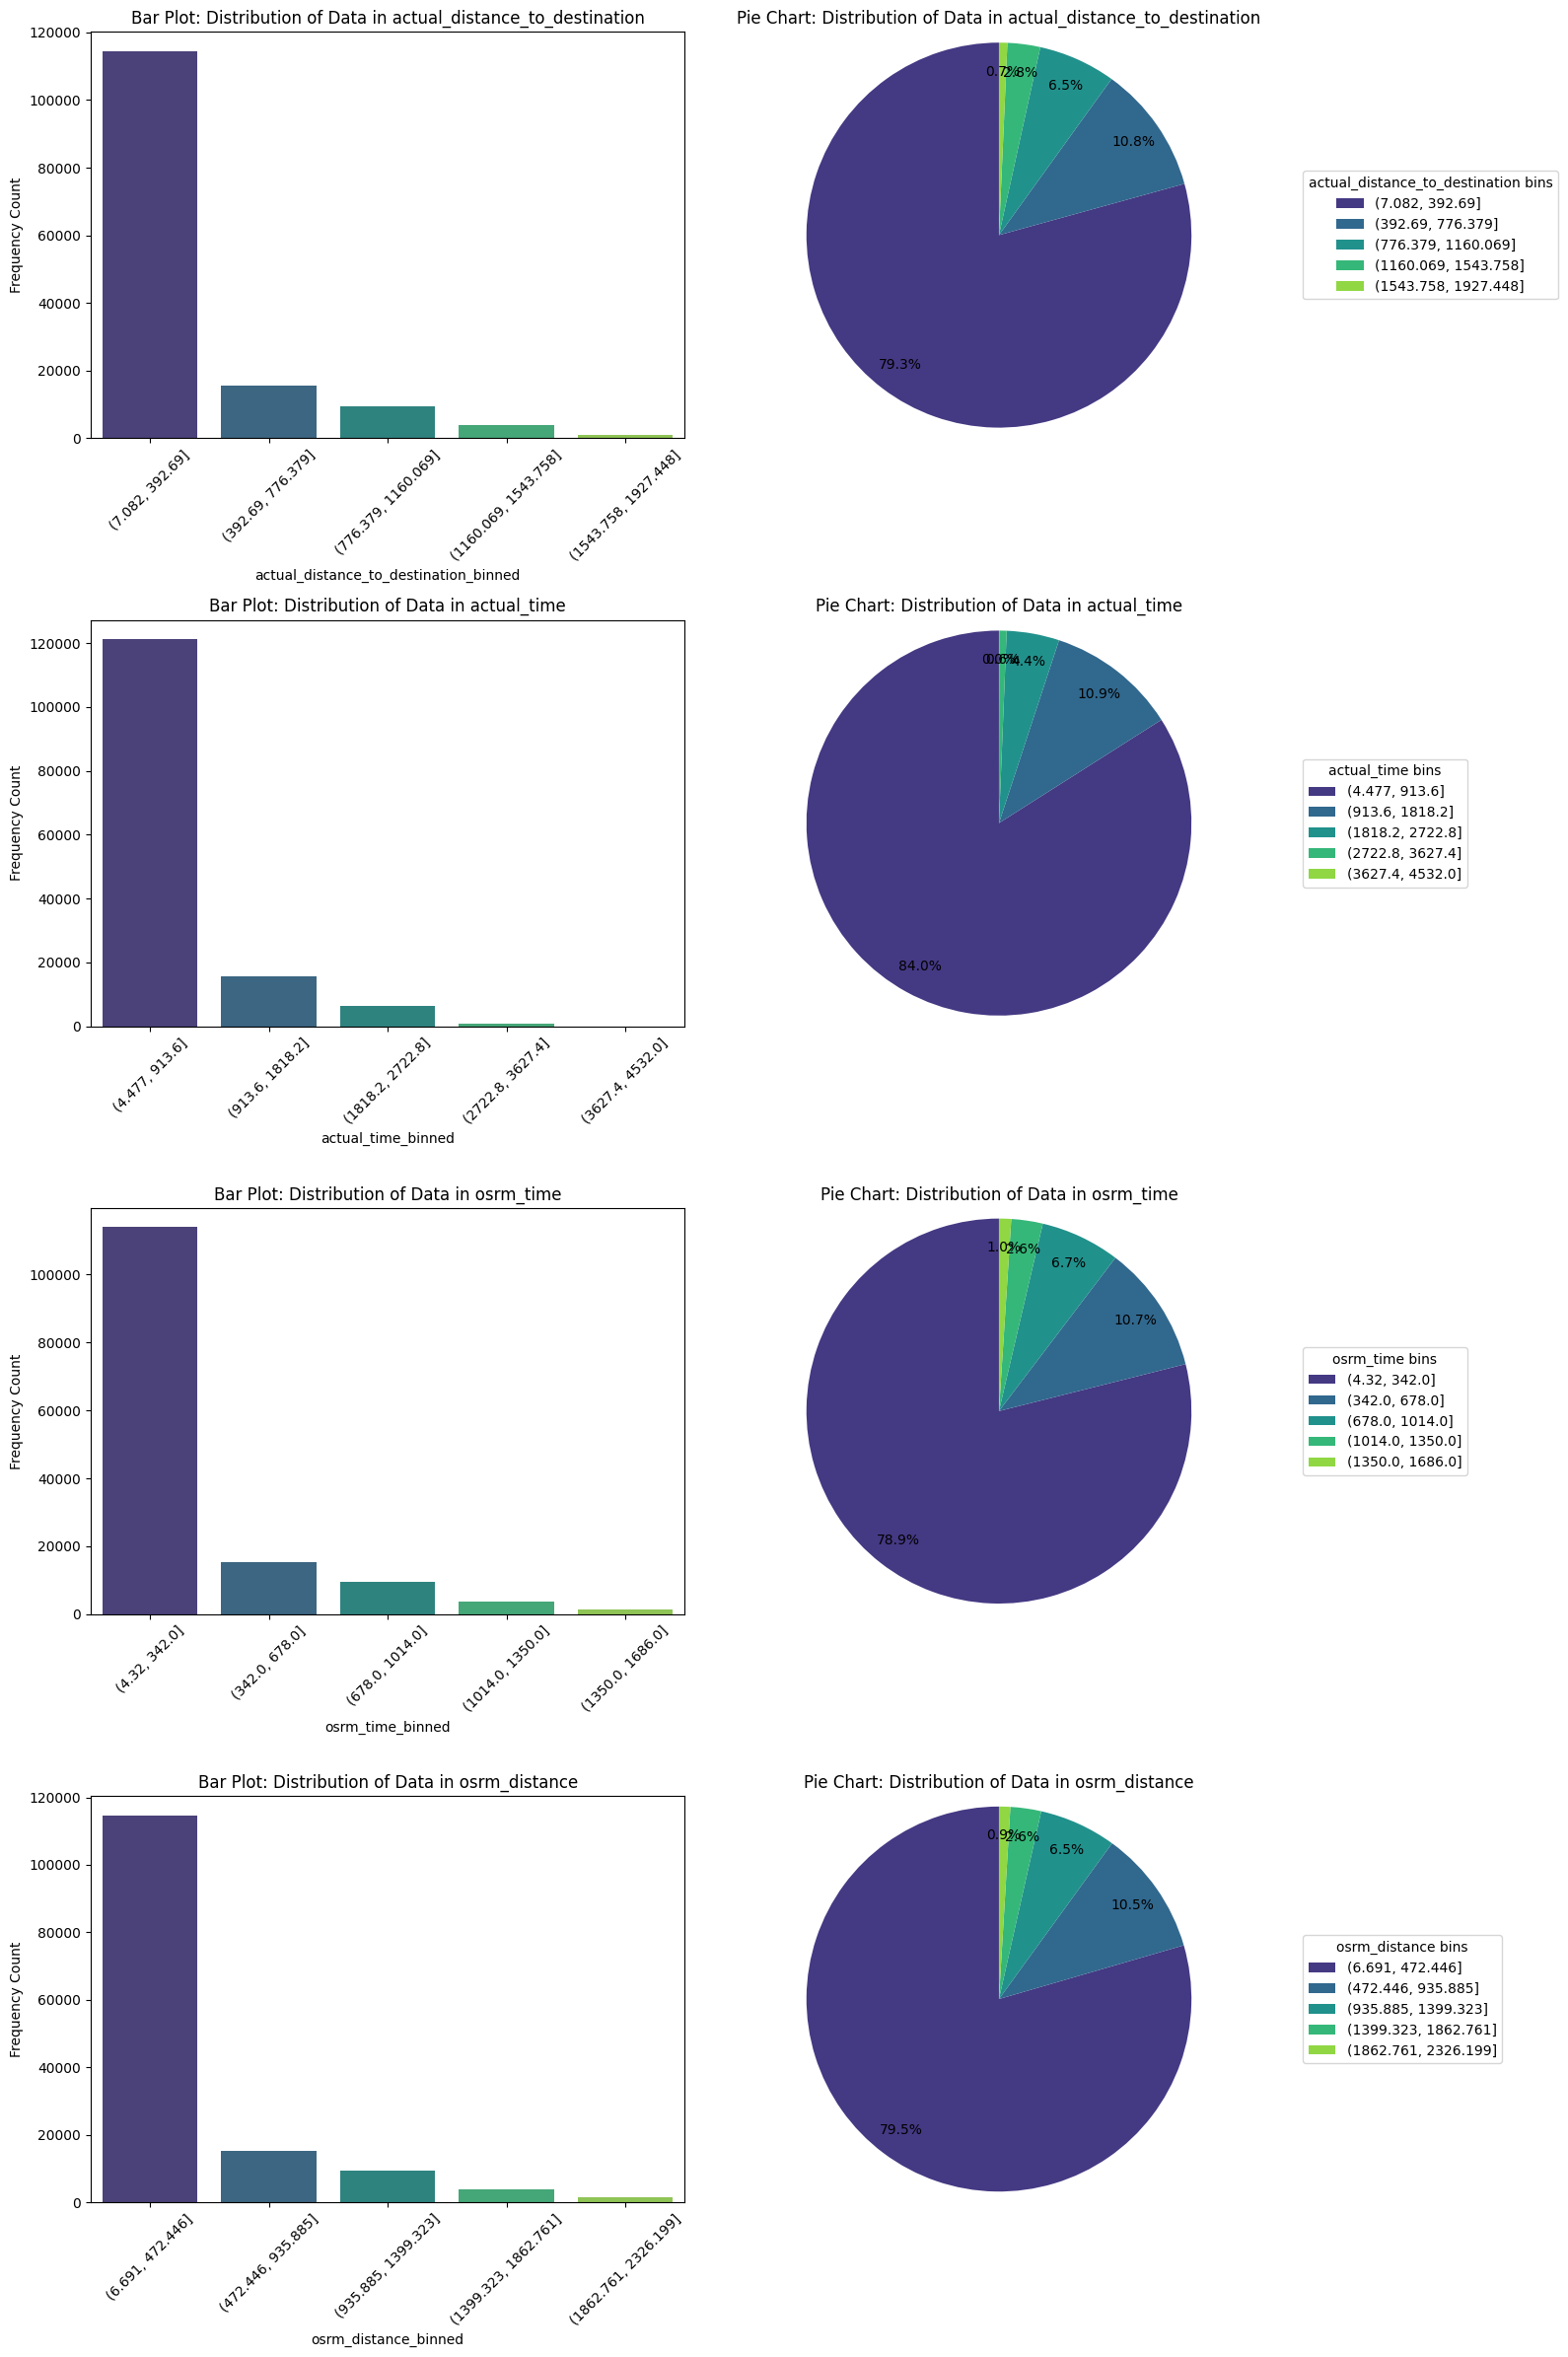

In [18]:
to_bin_columns = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance']

def to_bins(df, cols):
    bin_size = 5  # Define the number of bins
    for col in cols:
        df[f"{col}_binned"] = pd.cut(df[col], bins=bin_size)  # Fix the column access

    # Plotting the binned columns
    plt.figure(figsize=(16, 24))  # Increased the figure size to accommodate pie charts
    for i, col in enumerate(cols):
        # Plotting the bar chart
        plt.subplot(len(cols), 2, 2*i + 1)
        sns.countplot(x=df[f"{col}_binned"], palette='viridis')
        plt.title(f"Bar Plot: Distribution of Data in {col}")
        plt.xlabel(f"{col}_binned")
        plt.ylabel("Frequency Count")
        plt.xticks(rotation=45)

        # Plotting the pie chart
        plt.subplot(len(cols), 2, 2*i + 2)
        bin_counts = df[f"{col}_binned"].value_counts()

        # Plot pie chart with labels outside
        wedges, texts, autotexts = plt.pie(bin_counts, 
                                           labels=None,  # Remove direct labels to avoid overlap
                                           autopct='%1.1f%%', 
                                           startangle=90, 
                                           colors=sns.color_palette('viridis', len(bin_counts)),
                                           pctdistance=0.85)  # Distance of percentage text from the center
        
        # Add legend to the side to avoid overlap
        plt.legend(wedges, bin_counts.index, title=f"{col} bins", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

        plt.title(f"Pie Chart: Distribution of Data in {col}")
        plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
    
    plt.tight_layout()
    plt.show()

# Call the function with the dataframe and the columns
to_bins(df=df, cols=to_bin_columns)


Key Observations:

1. Skewness in Distance Distributions:
- Actual and OSM Distances: Both the actual and estimated distances show a right-skewed distribution, indicating that a majority of rides/delivery are shorter, with fewer longer rides.
- Bar Plots: The bar plots confirm this skewness, with higher frequencies for shorter distance bins.

2. Concentration in Time Distributions:
- Actual and OSM Times: The distributions for actual and estimated times are less skewed, but there's still a concentration of rides/delivery of items in shorter durations.
- Bar Plots: The bar plots show a clear peak in the shorter time bins.

3. Discrepancy Between Actual and Estimated Values:
- Distance: The pie charts reveal a difference in the distribution of actual and estimated distances. This might suggest that factors like traffic or detours influence the actual distance.
- Time: The pie charts for time show a similar discrepancy, highlighting the potential impact of traffic or other factors on travel time.

4. Relationship Between Distance and Time:
- Correlation: While not explicitly shown, it's reasonable to assume a positive correlation between distance and time. Longer distances would generally require more time.

#### Potential Insights:

1. Pricing Strategy: The skewed distribution of distances and times suggests that a pricing model with a higher base fare and lower per-unit charge for distance or time could be more equitable.
2. Route Optimization: The discrepancy between actual and estimated values indicates room for improvement in route optimization algorithms to account for real-world factors.
3. Traffic Management: Understanding the concentration of rides in certain distance and time ranges can help in traffic management and infrastructure planning.
4. Customer Satisfaction: Analyzing the distribution of ride durations can help identify potential areas for improvement in terms of customer satisfaction.

## Checking Top source and destination name

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/443925310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/443925310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/443925310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")
/var/fo

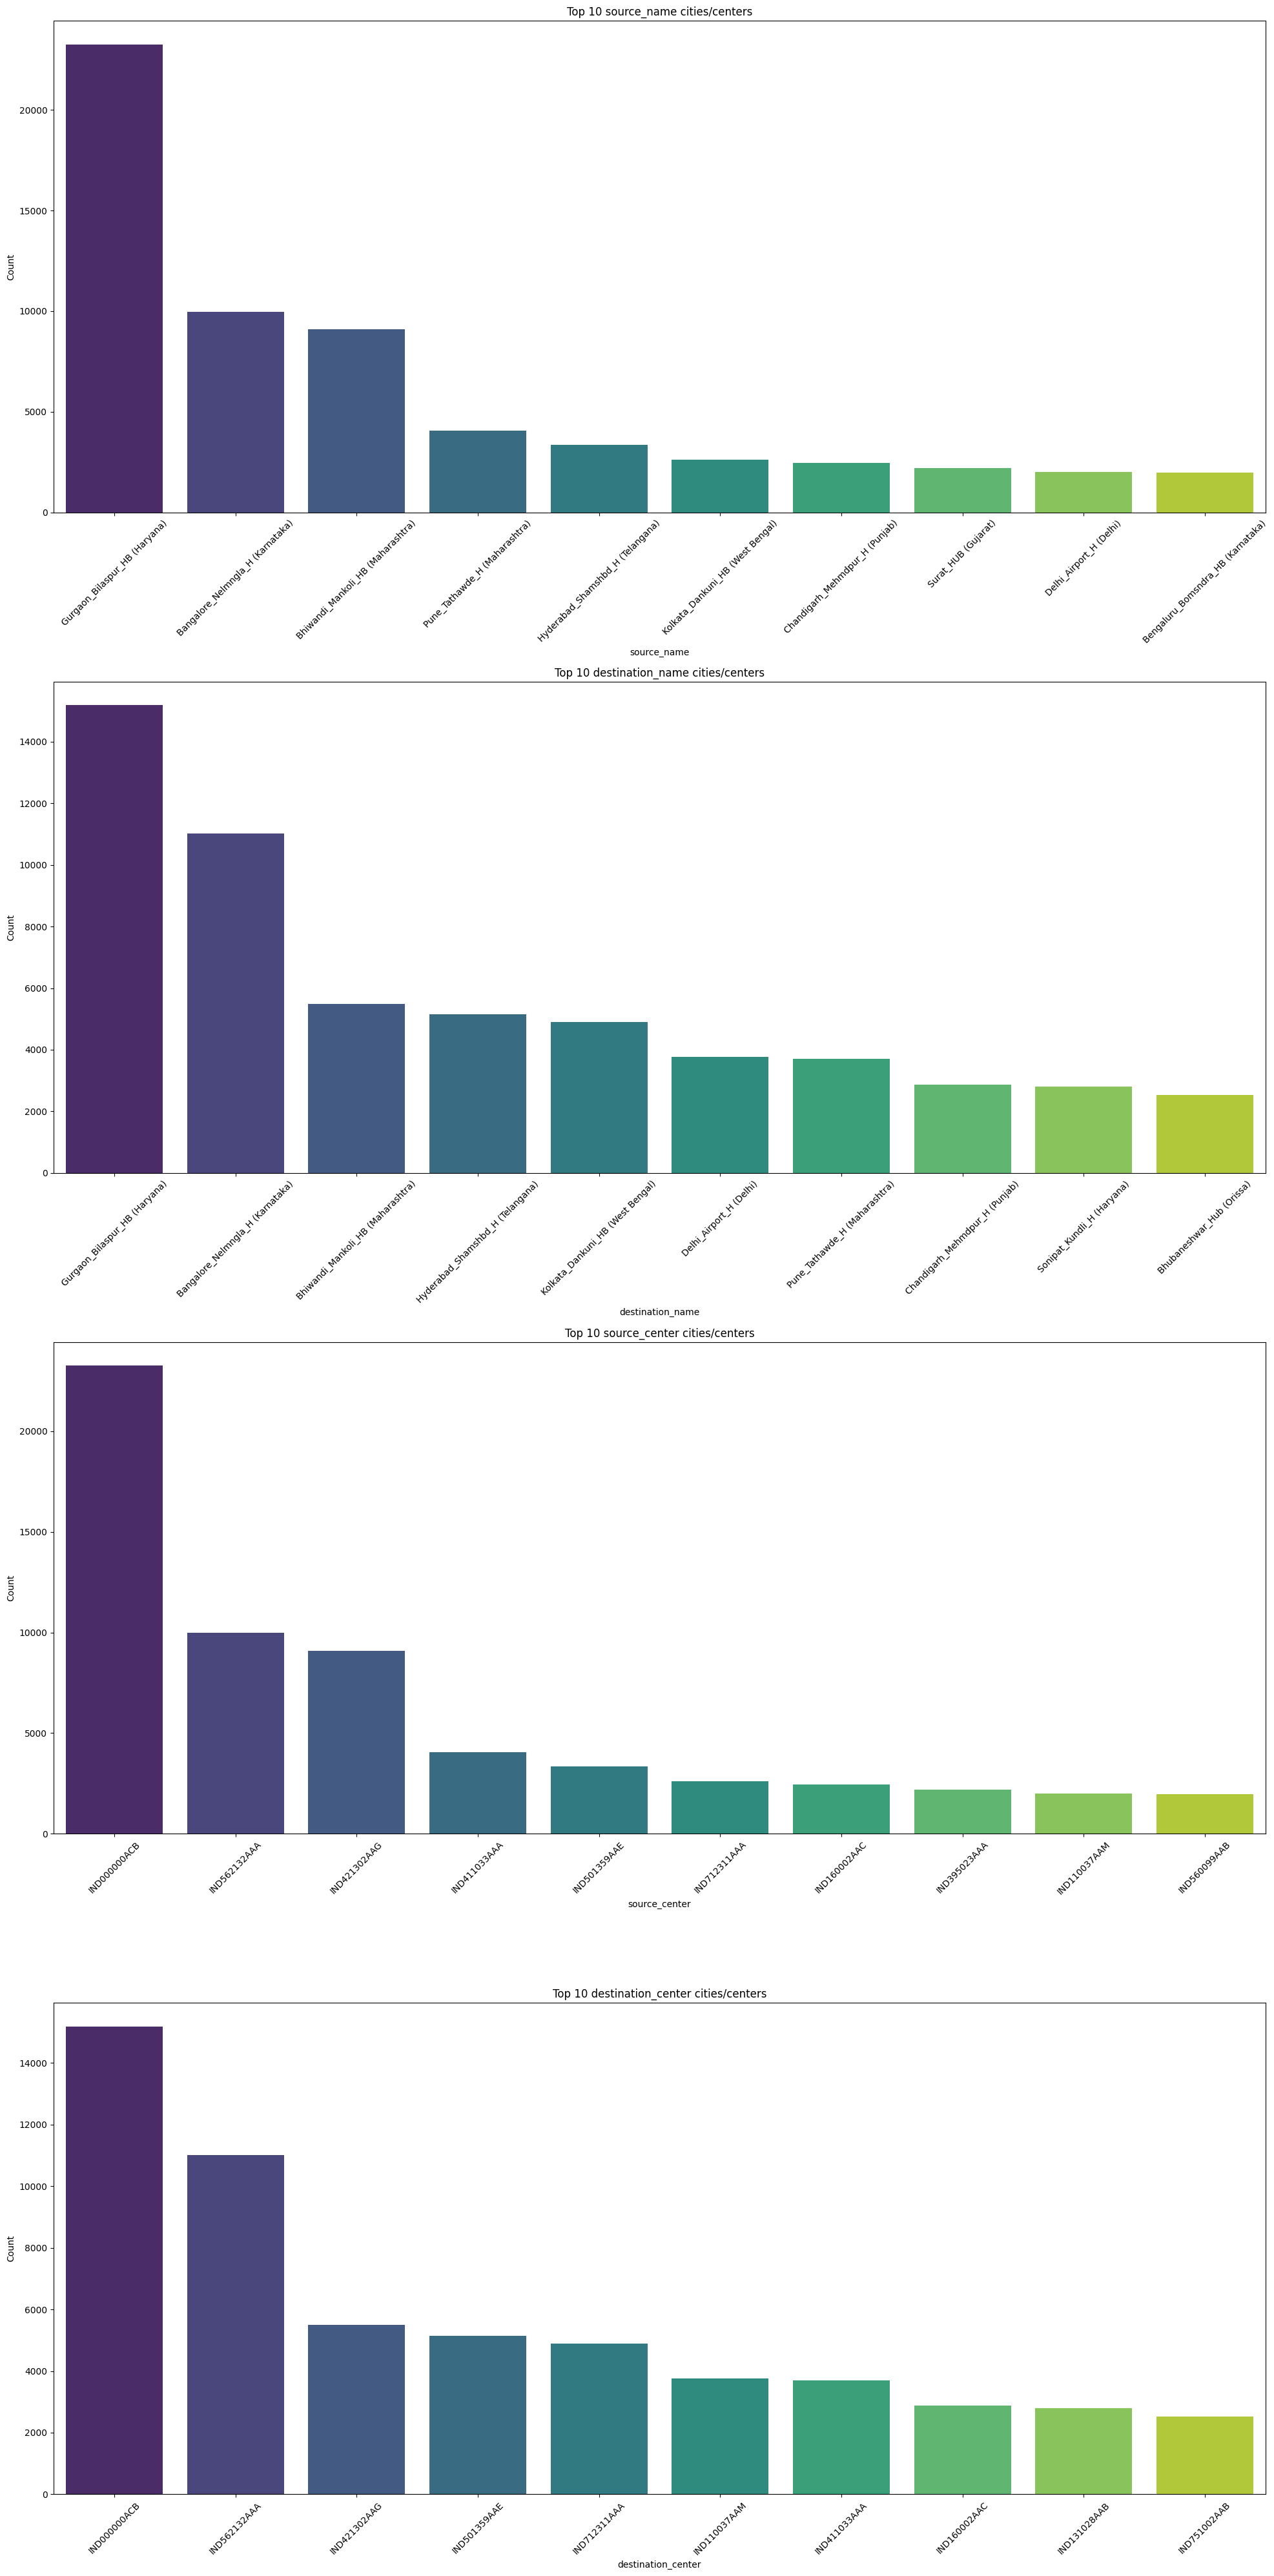

In [19]:
source_destination = ['source_name', 'destination_name', 'source_center', 'destination_center']

def top10_source_destination_name(df):
    plt.figure(figsize=(20, 10 * len(source_destination)))
    
    for idx, col in enumerate(source_destination):
        plt.subplot(len(source_destination), 1, idx + 1)  # Create one subplot per column
        
        
        top_10 = df.groupby(col).size().sort_values(ascending=False).head(10)
        
        # Create the bar plot for the top 10 cities/centers
        sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")
        
        # Add titles and labels
        plt.title(f"Top 10 {col} cities/centers")
        plt.xlabel(f"{col}")
        plt.ylabel("Count")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()

# Example usage
top10_source_destination_name(df)

## Key Observations:

1. Dominant Source and Destination:
- Gurugram-Jaipur Highway: This warehouse appears to be the most frequently used both as a source and a destination, suggesting its strategic location or high operational capacity.
- Other Prominent Warehouses: Warehouses in Bengaluru, Mumbai, and Hyderabad also feature prominently in both lists, indicating their importance in Delhivery's network.

2. Regional Distribution:
- Northern India: Several warehouses in the northern region, such as Gurugram-Jaipur Highway and Delhi Airport, are among the top sources and destinations, suggesting a strong focus on the northern Indian market.
- Southern India: Bengaluru and Hyderabad, located in southern India, are also significant hubs, indicating a growing presence in that region.

3. Network Connectivity:
- Hub-and-Spoke Model: The concentration of shipments at certain warehouses suggests a hub-and-spoke model, where these warehouses act as central hubs for distribution to other locations.

### Potential Insights:

1. Network Optimization: The data can be used to identify potential bottlenecks or inefficiencies in the current network. For example, if a particular warehouse is consistently overloaded, it might be necessary to expand its capacity or redistribute shipments.
2. Inventory Management: Understanding the top source and destination warehouses can help in optimizing inventory levels at each location to meet demand.
Market Expansion: The data can provide insights into regions with high demand for Delhivery's services, allowing the company to focus on expanding its operations in those areas.
3. Customer Service: Identifying the most frequently used warehouses can help in improving customer service by ensuring that these locations have adequate resources to meet demand.



## Checking top and below 10 states and cities

In [20]:
# Split the 'source_name' column into two columns: 'city' and 'state'
df[['city_s', 'state_s']] = df['source_name'].str.split('(', expand=True)

# Remove the closing parenthesis from the 'state' column
df['state_s'] = df['state_s'].str.replace(')', '')

# Split the 'source_name' column into two columns: 'city' and 'state'
df[['city_d', 'state_d']] = df['destination_name'].str.split('(', expand=True)

# Remove the closing parenthesis from the 'state' column
df['state_d'] = df['state_d'].str.replace(')', '')

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/458807897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='viridis', ax=axes[0])
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/458807897.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis', ax=axes[1])


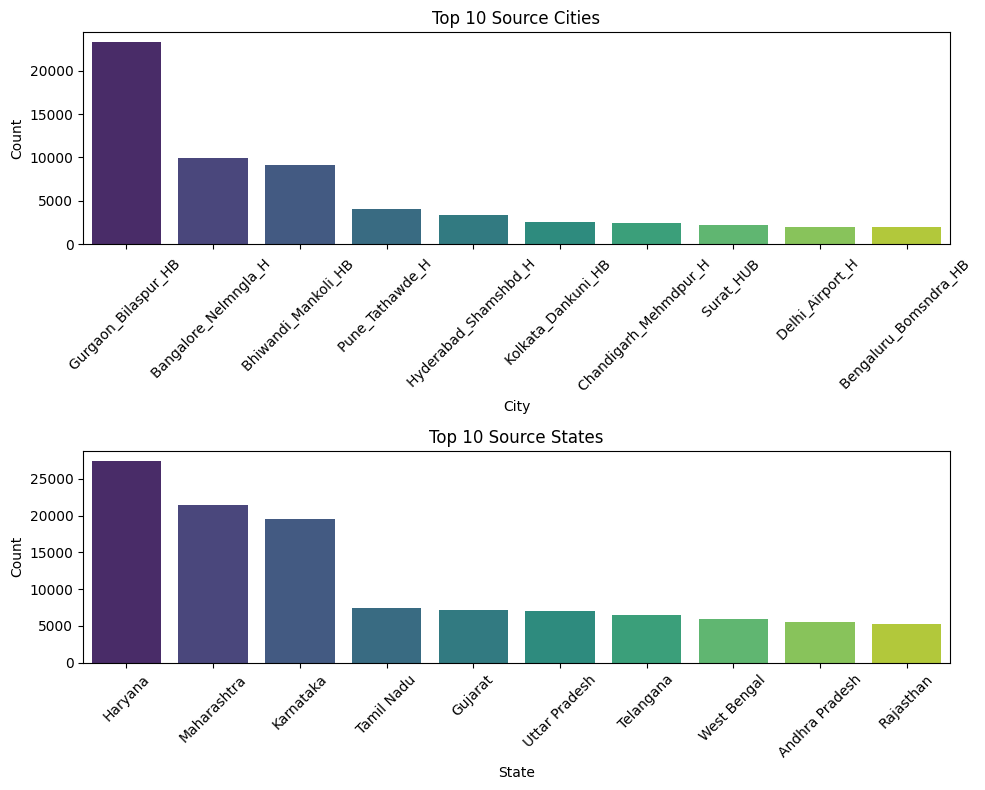

In [21]:
city_counts = df['city_s'].value_counts()
state_counts = df['state_s'].value_counts()

# Create two subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Plot the countplot for top 10 cities
sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Source Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot the countplot for top 10 states
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis', ax=axes[1])
axes[1].set_title('Top 10 Source States')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/2793624581.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='viridis', ax=axes[0])
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/2793624581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis', ax=axes[1])


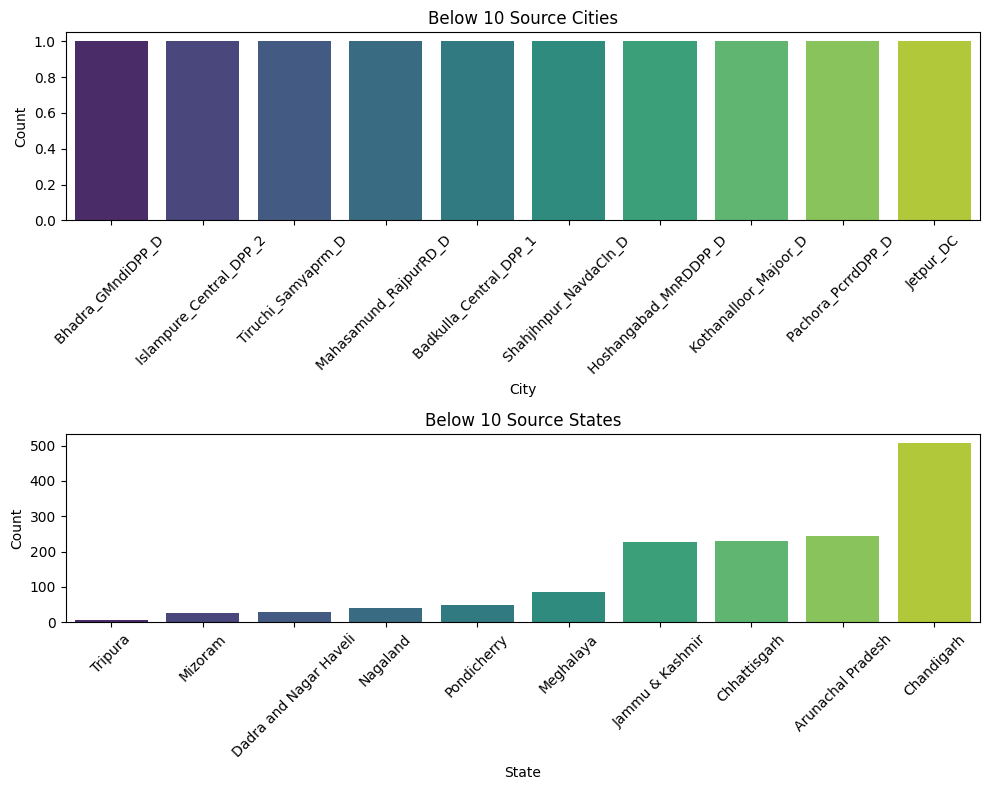

In [22]:
city_counts = df['city_s'].value_counts()[::-1]
state_counts = df['state_s'].value_counts()[::-1]


fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Plot the countplot for top 10 cities
sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='viridis', ax=axes[0])
axes[0].set_title('Below 10 Source Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot the countplot for top 10 states
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis', ax=axes[1])
axes[1].set_title('Below 10 Source States')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Key Observations

- Top 10 Source Cities:

1. Gurgaon and Bangalore are the most frequently occurring cities in the dataset, indicating a significant concentration of activity in these regions.
2. Delhi, Hyderabad, and Bhiwandi also appear multiple times in the top 10, suggesting their importance in the transportation or logistics network.

- Top 10 States:

1. Haryana and Karnataka have the highest number of occurrences, indicating a strong presence in these states.
2. Maharashtra, Telangana, and Delhi are also well-represented among the top 10 states.

- Remaining Cities and States:

1. The cities and states with lower frequencies are more diverse, suggesting a wider geographical spread of activities.
2. Orissa and Gujarat appear multiple times in the "Below 10" categories, indicating a relatively high number of cities and states from these regions.


#### Overall Observations:

1. The data appears to be concentrated in certain regions, with cities and states in northern and southern India being particularly prominent.
2. The distribution of cities and states suggests a network with multiple hubs and spokes, with some regions serving as central points for transportation or logistics activities.

## Destination name

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/3560568215.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='viridis', ax=axes[0])
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/3560568215.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis', ax=axes[1])


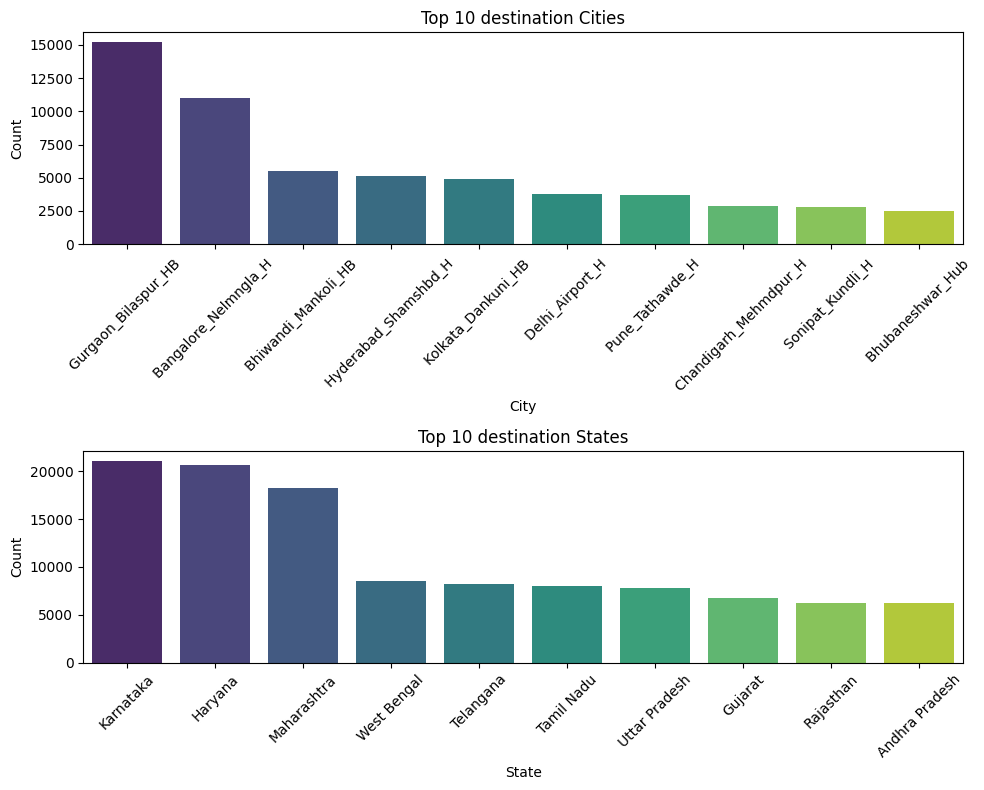

In [23]:
city_counts = df['city_d'].value_counts()
state_counts = df['state_d'].value_counts()

# Create two subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Plot the countplot for top 10 cities
sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 destination Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot the countplot for top 10 states
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis', ax=axes[1])
axes[1].set_title('Top 10 destination States')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/1761582632.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='viridis', ax=axes[0])
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/1761582632.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis', ax=axes[1])


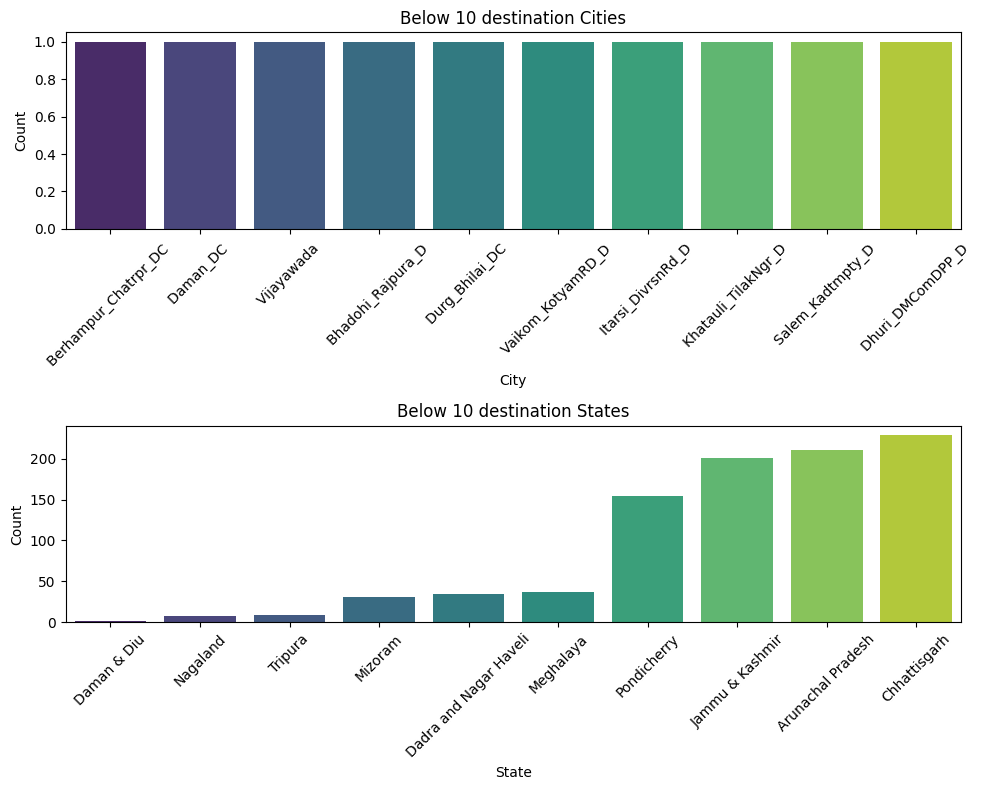

In [24]:
city_counts = df['city_d'].value_counts()[::-1]
state_counts = df['state_d'].value_counts()[::-1]

# Create two subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Plot the countplot for top 10 cities
sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='viridis', ax=axes[0])
axes[0].set_title('Below 10 destination Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot the countplot for top 10 states
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis', ax=axes[1])
axes[1].set_title('Below 10 destination States')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Key Insights:

- Top 10 Cities:

1. Gurgaon and Bangalore are the most frequently occurring cities in the dataset, indicating a significant concentration of activity in these regions.
2. Delhi, Hyderabad, and Bhiwandi also appear multiple times in the top 10, suggesting their importance in the transportation or logistics network.

- Top 10 States:

1. Haryana and Karnataka have the highest number of occurrences, indicating a strong presence in these states.
2. Maharashtra, Telangana, and Delhi are also well-represented among the top 10 states.

- Remaining Cities and States:

1. The cities and states with lower frequencies are more diverse, suggesting a wider geographical spread of activities.
2. Orissa and Gujarat appear multiple times in the "Below 10" categories, indicating a relatively high number of cities and states from these regions.

#### Overall Observations:

1. The data appears to be concentrated in certain regions, with cities and states in northern and southern India being particularly prominent.
2. The distribution of cities and states suggests a network with multiple hubs and spokes, with some regions serving as central points for transportation or logistics activities.

### Top 15 source and destination combination

In [25]:
df.groupby(['source_name', 'destination_name']).size().sort_values(ascending=False).head(15)

source_name                        destination_name                 
Gurgaon_Bilaspur_HB (Haryana)      Bangalore_Nelmngla_H (Karnataka)     4976
Bangalore_Nelmngla_H (Karnataka)   Gurgaon_Bilaspur_HB (Haryana)        3316
Gurgaon_Bilaspur_HB (Haryana)      Kolkata_Dankuni_HB (West Bengal)     2862
                                   Hyderabad_Shamshbd_H (Telangana)     1639
                                   Bhiwandi_Mankoli_HB (Maharashtra)    1617
Bhiwandi_Mankoli_HB (Maharashtra)  Gurgaon_Bilaspur_HB (Haryana)        1269
Guwahati_Hub (Assam)               Delhi_Airport_H (Delhi)              1137
Bhiwandi_Mankoli_HB (Maharashtra)  Bangalore_Nelmngla_H (Karnataka)     1131
Gurgaon_Bilaspur_HB (Haryana)      Pune_Tathawde_H (Maharashtra)        1120
                                   MAA_Poonamallee_HB (Tamil Nadu)      1015
Bangalore_Nelmngla_H (Karnataka)   Jaipur_Hub (Rajasthan)                978
Bhiwandi_Mankoli_HB (Maharashtra)  Delhi_Airport_H (Delhi)               965
Surat_H

### Highest average time taken to delivery 

In [26]:
df.groupby(['source_name', 'destination_name'])['actual_time'].mean().sort_values(ascending=False)

source_name                       destination_name                   
Delhi_Airport_H (Delhi)           Guwahati_Hub (Assam)                   1861.867647
Chandigarh_Mehmdpur_H (Punjab)    Bangalore_Nelmngla_H (Karnataka)       1682.728395
Guwahati_Hub (Assam)              Delhi_Airport_H (Delhi)                1661.665787
Bangalore_Nelmngla_H (Karnataka)  Kolkata_Dankuni_HB (West Bengal)       1549.171296
Kolkata_Dankuni_HB (West Bengal)  Bhiwandi_Mankoli_HB (Maharashtra)      1531.104278
                                                                            ...     
Bhubaneshwar_Nayapalli (Orissa)   Khurdha_JatniDPP_D (Orissa)              15.000000
Vapi_IndEstat_I (Gujarat)         Bhilad_Umargaon_DC (Gujarat)             15.000000
Bhubaneshwar_Nayapalli (Orissa)   Bhubaneshwar_Hub (Orissa)                14.833333
Khurdha_JatniDPP_D (Orissa)       Khurdha_MdhsnDPP_D (Orissa)              14.000000
Nabarangpr_PhdofDPP_D (Orissa)    Pappadahandi_Central_DPP_2 (Orissa)      13.66

### Lowest average time taken to delivery

In [27]:
df.groupby(['source_name', 'destination_name'])['actual_time'].mean().sort_values(ascending=True).head(20)

source_name                            destination_name                      
Nabarangpr_PhdofDPP_D (Orissa)         Pappadahandi_Central_DPP_2 (Orissa)       13.666667
Khurdha_JatniDPP_D (Orissa)            Khurdha_MdhsnDPP_D (Orissa)               14.000000
Bhubaneshwar_Nayapalli (Orissa)        Bhubaneshwar_Hub (Orissa)                 14.833333
                                       Khurdha_JatniDPP_D (Orissa)               15.000000
Vapi_IndEstat_I (Gujarat)              Bhilad_Umargaon_DC (Gujarat)              15.000000
Attingal_Central_D_2 (Kerala)          Kalluvathukal_Pariplly_D (Kerala)         15.282051
Anandnagar_LohiaDPP_D (Uttar Pradesh)  Maharajganj_PakriDPP_D (Uttar Pradesh)    16.000000
Khurdha_MunplDPP_D (Orissa)            Khurdha_JatniDPP_D (Orissa)               16.000000
Sonipat_AmzonDev_V (Haryana)           Sonipat_Kundli_P (Haryana)                16.207207
Hyd_Uppal_Dc (Telangana)               Ghatkesar_Central_D_1 (Telangana)         16.250000
Delhi_Lajpat

### Most frequent route

1. Gurgaon-Bilaspur-Bangalore: This route is the most frequently used, with 4976 shipments between these locations.
2. Gurgaon-Bilaspur-Kolkata: This is the second most frequently used route, with 3316 shipments.
3. Gurgaon-Bilaspur-Hyderabad: This is the third most frequently used route, with 2862 shipments.

### Highest average time for long distance

1. Delhi Airport H (Delhi) to Guwahati Hub (Assam): This is the route with the longest average travel time, taking 1861.87 minutes (approximately 31 hours).
2. Chandigarh Mehmdpur H (Punjab) to Bangalore Nelmngla H (Karnataka): This route has the second-longest average travel time, taking 1682.73 minutes (approximately 28 hours).
3. Guwahati Hub (Assam) to Delhi Airport H (Delhi): This route has the third-longest average travel time, taking 1661.67 minutes (approximately 28 hours).

### Lowest Average Travel Times:

1. Nabarangpur-PhdofDPP_D (Orissa) to Pappadahandi-Central_DPP_2 (Orissa): This is the route with the shortest average travel time, taking only 13.67 minutes.
2. Khurdha-JatniDPP_D (Orissa) to Khurdha-MdhsnDPP_D (Orissa): This route has the second-shortest average travel time, taking 14 minutes.
3. Bhubaneswar-Nayapalli (Orissa) to Bhubaneswar-Hub (Orissa): This route has the third-shortest average travel time, taking 14.83 minutes.

## Extract features like month, year and day for Visualization

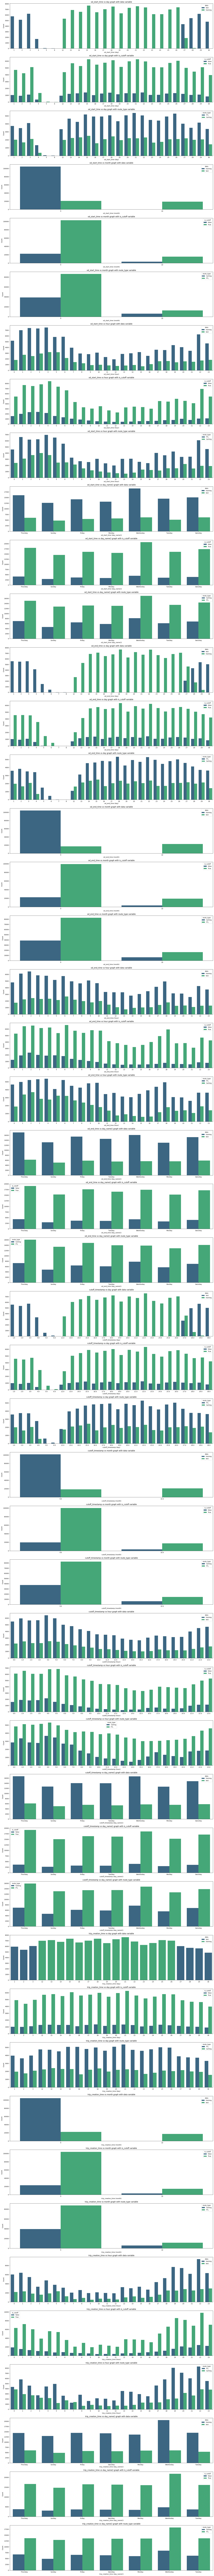

In [28]:
hue_col = ['data', 'is_cutoff', 'route_type']
time_col = ['od_start_time', 'od_end_time', 'cutoff_timestamp', 'trip_creation_time']
segregate = ['day', 'month', 'hour', 'day_name()'] 

def graphs(df):
    plt.figure(figsize=(20, len(hue_col)*len(time_col)*len(segregate)*5))
    counts = 1
    
    for i in time_col:
        for j in segregate:
            for k in hue_col:
                
                if j == 'day_name()':
                    
                    df[f'{i}_day_name'] = df[i].dt.day_name()
                    column_name = f'{i}_day_name'
                else:
                    df[f'{i}_{j}'] = getattr(df[i].dt, j)
                    column_name = f'{i}_{j}'
                
                # Create one graph per row
                plt.subplot(48, 1, counts)
                sns.countplot(x=df[column_name], hue=df[k], palette='viridis')
                
                plt.title(f"{i} vs {j} graph with {k} variable")
                plt.xlabel(f"{i} ({j})")
                plt.ylabel("Count")
                counts += 1
    
    plt.tight_layout()
    plt.show()

# Example usage
graphs(df)

## Extract features like month, year and day with hue as well

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/736102726.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')  # If hue_col is provided
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/736102726.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')  # If hue_col is provided
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_25046/736102726.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')  # If hue_col i

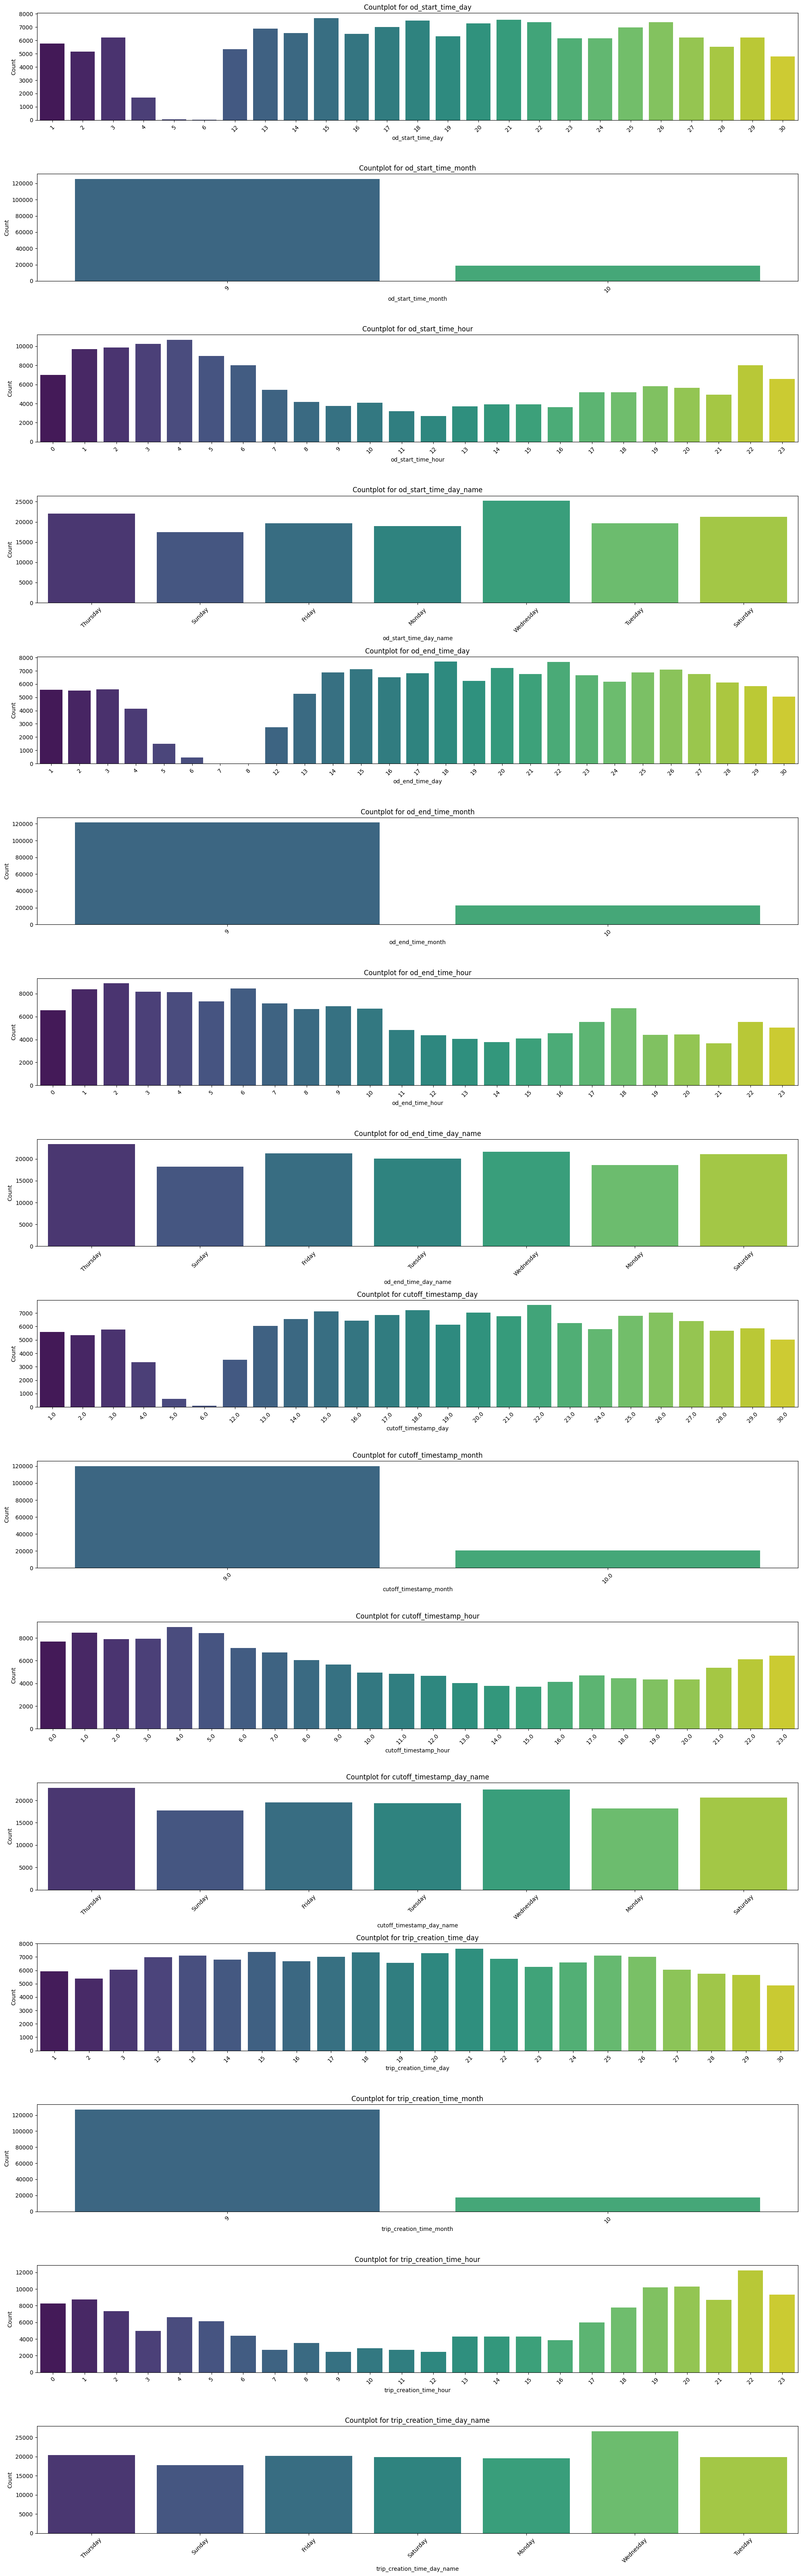

In [29]:


columns = [
    'od_start_time_day', 'od_start_time_month', 'od_start_time_hour', 'od_start_time_day_name', 
    'od_end_time_day', 'od_end_time_month', 'od_end_time_hour', 'od_end_time_day_name',
    'cutoff_timestamp_day', 'cutoff_timestamp_month', 'cutoff_timestamp_hour', 'cutoff_timestamp_day_name',
    'trip_creation_time_day', 'trip_creation_time_month', 'trip_creation_time_hour', 'trip_creation_time_day_name'
]



def plot_countplots(df, columns):
    plt.figure(figsize=(20, len(columns) * 4))  # Adjust the figure size dynamically based on the number of columns
    
    for idx, col in enumerate(columns):
        plt.subplot(len(columns), 1, idx + 1)  # Create a new subplot for each column
        if hue_col:
            sns.countplot(x=df[col], palette='viridis')  # If hue_col is provided
        else:
            sns.countplot(x=df[col], palette='viridis')  # Simple countplot without hue
        plt.title(f"Countplot for {col}")
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_countplots(df, columns) 

## Key Observations:

1. Consistent Daily Patterns:

- Weekday Peaks: These plots show a clear pattern of higher ride volumes on weekdays compared to weekends.
- Weekend Consistency: While weekday volumes are higher, weekend data points appear relatively consistent, suggesting a steady demand on weekends.

2. Monthly Fluctuations:

Seasonal Variation: The plots hint at potential seasonal variations in ride demand. However, with only a single year's data, it's difficult to confirm a strong seasonal trend.

3. Hourly Peaks:

- Off-Peak Periods: The plots show lower volumes during off-peak hours, suggesting a more casual or leisure-based usage during these times.

4. Weekday Differences:
- Weekend Consistency: The plots reinforce the observation of consistent weekend demand.
- Weekday Variation: Weekday volumes appear to vary slightly, with potential differences in demand patterns across different days of the week.

### Potential Insights:

1. Pricing Strategies: The hourly peak patterns suggest that dynamic pricing strategies could be implemented to optimize revenue during peak hours.
2. Fleet Management: Understanding the daily and weekly patterns can help in planning fleet size and distribution to meet demand efficiently.
3. Marketing Campaigns: Seasonal variations in demand can inform targeted marketing campaigns to encourage ride usage during less busy periods.
4. Customer Segmentation: Analyzing the distribution of rides across different days and times can help identify distinct customer segments with varying needs and preferences.

## Removing all the columns after visualization

In [30]:
cols_to_drop = ['actual_distance_to_destination_binned',
       'actual_time_binned', 'osrm_time_binned', 'osrm_distance_binned',
       'od_start_time_day', 'od_start_time_month', 'od_start_time_hour',
       'od_start_time_day_name', 'od_end_time_day', 'od_end_time_month',
       'od_end_time_hour', 'od_end_time_day_name', 'cutoff_timestamp_day',
       'cutoff_timestamp_month', 'cutoff_timestamp_hour',
       'cutoff_timestamp_day_name', 'trip_creation_time_day',
       'trip_creation_time_month', 'trip_creation_time_hour',
       'trip_creation_time_day_name']

df.drop(columns=cols_to_drop, inplace=True, axis=1)

#### To ensure the interpretability and stability of the coefficients in a trained model, it is important to assess multicollinearity among numerical columns. VIF (Variance Inflation Factor) is a common metric used for this purpose. High VIF values indicate that a predictor variable is highly correlated with other predictors, which can make it difficult to interpret its individual effect on the outcome.

### Calculate the time taken between od_start_time and od_end_time

In [31]:
df['total_time_taken'] = df['od_end_time'] - df['od_start_time']

df[df['total_time_taken']==df['total_time_taken'].max()]

data         trip_creation_time  \
123196  test 2018-10-01 23:35:54.432745   

                                      route_schedule_uuid route_type  \
123196  thanos::sroute:4316e05f-b4cc-4ea7-b801-62a93ae...    Carting   

                      trip_uuid source_center  \
123196  trip-153843695443252828  IND764071AAB   

                                source_name destination_center  \
123196  Pappadahandi_Central_DPP_2 (Orissa)       IND530012AAA   

                                  destination_name              od_start_time  \
123196  Visakhapatnam_Gajuwaka_IP (Andhra Pradesh) 2018-10-02 15:21:51.236205   

                      od_end_time  start_scan_to_end_scan  is_cutoff  \
123196 2018-10-08 03:00:24.353479                  7898.0      False   

        cutoff_factor    cutoff_timestamp  actual_distance_to_destination  \
123196            196 2018-10-02 15:32:30                      196.451691   

        actual_time  osrm_time  osrm_distance     factor  segment_actual_time  \
123196       2541.0      211.0       293.3271  12.042654               2541.0   

        segment_osrm_time  segment_osrm_distance  segment_factor  \
123196              211.0               293.3271       12.042654   

       od_start_date                       city_s state_s  \
123196    2018-10-02  Pappadahandi_Central_DPP_2   Orissa   

                            city_d         state_d       total_time_taken  
123196  Visakhapatnam_Gajuwaka_IP   Andhra Pradesh 5 days 11:38:33.117274

In [32]:
df[df['total_time_taken']==df['total_time_taken'].min()]


data         trip_creation_time  \
38598  training 2018-09-22 06:57:59.636076   
38599  training 2018-09-22 06:57:59.636076   

                                     route_schedule_uuid route_type  \
38598  thanos::sroute:028fad3e-6945-411a-ab93-b5ac74c...    Carting   
38599  thanos::sroute:028fad3e-6945-411a-ab93-b5ac74c...    Carting   

                     trip_uuid source_center                   source_name  \
38598  trip-153759947963581700  IND603203AAA  Chennai_Potheri (Tamil Nadu)   
38599  trip-153759947963581700  IND603203AAA  Chennai_Potheri (Tamil Nadu)   

      destination_center                  destination_name  \
38598       IND600048AAA  Chennai_Vandalur_Dc (Tamil Nadu)   
38599       IND600048AAA  Chennai_Vandalur_Dc (Tamil Nadu)   

                   od_start_time                od_end_time  \
38598 2018-09-22 08:17:04.727792 2018-09-22 08:37:46.896579   
38599 2018-09-22 08:17:04.727792 2018-09-22 08:37:46.896579   

       start_scan_to_end_scan  is_cutoff  cutoff_factor cutoff_timestamp  \
38598                    20.0       True              9              NaT   
38599                    20.0      False              9              NaT   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
38598                        9.665758         20.0       12.0         14.162   
38599                        9.665800         20.0       12.0         14.162   

         factor  segment_actual_time  segment_osrm_time  \
38598  1.666667                 20.0               12.0   
38599  1.666667                  0.0                0.0   

       segment_osrm_distance  segment_factor od_start_date            city_s  \
38598                 14.162        1.666667    2018-09-22  Chennai_Potheri    
38599                  0.000       -1.000000    2018-09-22  Chennai_Potheri    

          state_s                city_d     state_d       total_time_taken  
38598  Tamil Nadu  Chennai_Vandalur_Dc   Tamil Nadu 0 days 00:20:42.168787  
38599  Tamil Nadu  Chennai_Vandalur_Dc   Tamil Nadu 0 days 00:20:42.168787

## Hypothesis testing between actual and osrm time

In [33]:
hypothesis_df = df.groupby('trip_uuid').agg({
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'actual_distance_to_destination': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum'
}).reset_index()

In [34]:
hypothesis_df.sample(10)

trip_uuid  actual_time  osrm_time  \
12804  trip-153833126741148716        257.0      118.0   
4128   trip-153721495212025583        711.0      345.0   
1665   trip-153689845995147706         92.0       45.0   
13720  trip-153845195330673703        179.0       54.0   
8932   trip-153780581958683253      10571.0     4193.0   
14778  trip-153861089559302126        138.0       53.0   
13291  trip-153839801987368128        330.0      163.0   
11384  trip-153810617402962615        169.0       48.0   
3876   trip-153717843580981409        124.0       36.0   
13536  trip-153843320197726819       1485.0      164.0   

       actual_distance_to_destination  osrm_distance  segment_actual_time  \
12804                      110.659833       126.4519                104.0   
4128                       222.146218       376.3088                208.0   
1665                        60.466976        63.5748                 55.0   
13720                       50.776171        64.8014                107.0   
8932                      4753.058310      5589.4985               1152.0   
14778                       50.007740        62.4373                 86.0   
13291                      130.722570       163.1103                116.0   
11384                       42.745631        58.3822                 87.0   
3876                        19.623878        29.4272                 62.0   
13536                      178.649184       204.9086               1140.0   

       segment_osrm_time  
12804               49.0  
4128               179.0  
1665                27.0  
13720               24.0  
8932               650.0  
14778               30.0  
13291               51.0  
11384               24.0  
3876                18.0  
13536               76.0

In [35]:
hypothesis_df.columns

Index(['trip_uuid', 'actual_time', 'osrm_time',
       'actual_distance_to_destination', 'osrm_distance',
       'segment_actual_time', 'segment_osrm_time'],
      dtype='object')

- Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.


In [36]:
# Define the alpha level
alpha = 0.05

# List of column pairs to perform t-tests on
column_pairs = [
    ('actual_time', 'osrm_time'),
    ('actual_distance_to_destination', 'osrm_distance'),
    ('segment_actual_time', 'segment_osrm_time'),
    ('osrm_time', 'segment_osrm_time')
]


for col1, col2 in column_pairs:
    t_stat, p_val = ttest_ind(hypothesis_df[col1], hypothesis_df[col2], equal_var=False)
    print(f"T-test between '{col1}' and '{col2}':")
    print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
    
    if p_val < alpha:
        print("Result: Reject the null hypothesis (significant difference)\n")
    else:
        print("Result: Fail to reject the null hypothesis (no significant difference)\n")


T-test between 'actual_time' and 'osrm_time':
t-statistic: 14.0548, p-value: 0.0000
Result: Reject the null hypothesis (significant difference)

T-test between 'actual_distance_to_destination' and 'osrm_distance':
t-statistic: -4.3371, p-value: 0.0000
Result: Reject the null hypothesis (significant difference)

T-test between 'segment_actual_time' and 'segment_osrm_time':
t-statistic: 32.8260, p-value: 0.0000
Result: Reject the null hypothesis (significant difference)

T-test between 'osrm_time' and 'segment_osrm_time':
t-statistic: 29.1735, p-value: 0.0000
Result: Reject the null hypothesis (significant difference)



## Verify by checking the means of each column pairs

In [37]:
print(f"average actual time : {hypothesis_df['actual_time'].mean()}, average osrm time : {hypothesis_df['osrm_time'].mean()}")

print(f"average actual distance : {hypothesis_df['actual_distance_to_destination'].mean()}, average osrm distance : {hypothesis_df['osrm_distance'].mean()}")

print(f"segement actual time : {hypothesis_df['segment_actual_time'].mean()}, segement osrm time : {hypothesis_df['segment_osrm_time'].mean()}")

average actual time : 4079.498546020153, average osrm time : 2092.8314059646987
average actual distance : 2290.673674693915, average osrm distance : 2786.86703365118
segement actual time : 353.0591735984311, segement osrm time : 180.5115980252925


1. Average Actual Time vs. Average OSRM Time
Average Actual Time: 4079.50 seconds
Average OSRM Time: 2092.83 seconds

### Interpretation:

The average actual travel time is nearly double the average OSRM estimated time.
This significant difference suggests that actual trips are taking much longer than estimated by OSRM.
Possible reasons could include traffic conditions, road closures, delays, or inaccuracies in the OSRM estimation model.

2. Average Actual Distance to Destination vs. Average OSRM Distance

Average Actual Distance: 2290.67 meters
Average OSRM Distance: 2786.87 meters

### Interpretation:

The actual distance traveled is less than the OSRM estimated distance.
This could imply that actual trips are taking shorter routes compared to what OSRM suggests, or there might be discrepancies in how the distances are measured.
It might also indicate potential routing inefficiencies or inaccuracies in the OSRM model.

3. Segment Actual Time vs. Segment OSRM Time

- Segment Actual Time: 353.06 seconds
- Segment OSRM Time: 180.51 seconds

### Interpretation:

The segment-level actual times are also significantly higher than the OSRM estimated times.
This reinforces the earlier conclusion that actual travel times are consistently longer than what OSRM estimates, potentially due to similar factors like traffic, stops, or delays not accounted for by OSRM.

### General Conclusions

Discrepancies Between Actual and OSRM Estimates: The data indicates a consistent trend where actual travel times are much longer, and actual distances are shorter compared to OSRM estimates. This suggests the need for adjustments in the OSRM model or better consideration of real-world conditions when estimating routes and times.

#### Implications:

1. For Routing and Logistics: If these discrepancies are systematic, using OSRM estimates for scheduling and planning could lead to inefficiencies, as actual conditions deviate significantly.
2. Model Calibration: There might be a need to recalibrate the OSRM model or use a more complex model that accounts for real-world variables like traffic, road conditions, and other factors influencing travel times and distances.


## Checking for data distribution as well for each column pair

In [38]:
for col1, col2 in column_pairs:
    
    # Perform K-S test
    ks_stat, ks_p_val = ks_2samp(hypothesis_df[col1], hypothesis_df[col2])
    
    print(f"### T-test and K-S test between '{col1}' and '{col2}' ###")
    
    
    # K-S test results
    print(f"K-S test: K-S statistic = {ks_stat:.4f}, p-value = {ks_p_val:.4f}")
    if ks_p_val < alpha:
        print("K-S test result: Reject the null hypothesis (different distributions)\n")
    else:
        print("K-S test result: Fail to reject the null hypothesis (same distribution)\n")

### T-test and K-S test between 'actual_time' and 'osrm_time' ###
K-S test: K-S statistic = 0.2316, p-value = 0.0000
K-S test result: Reject the null hypothesis (different distributions)

### T-test and K-S test between 'actual_distance_to_destination' and 'osrm_distance' ###
K-S test: K-S statistic = 0.1332, p-value = 0.0000
K-S test result: Reject the null hypothesis (different distributions)

### T-test and K-S test between 'segment_actual_time' and 'segment_osrm_time' ###
K-S test: K-S statistic = 0.2601, p-value = 0.0000
K-S test result: Reject the null hypothesis (different distributions)

### T-test and K-S test between 'osrm_time' and 'segment_osrm_time' ###
K-S test: K-S statistic = 0.2405, p-value = 0.0000
K-S test result: Reject the null hypothesis (different distributions)



#### The results of the independent t-test indicate that there is a significant difference between the mean actual and predicted travel times, distances, and segment times. This suggests that the model used to generate the predictions may need to be improved or that there may be systematic errors in the data collection process. 

## Visualizing through various graphs

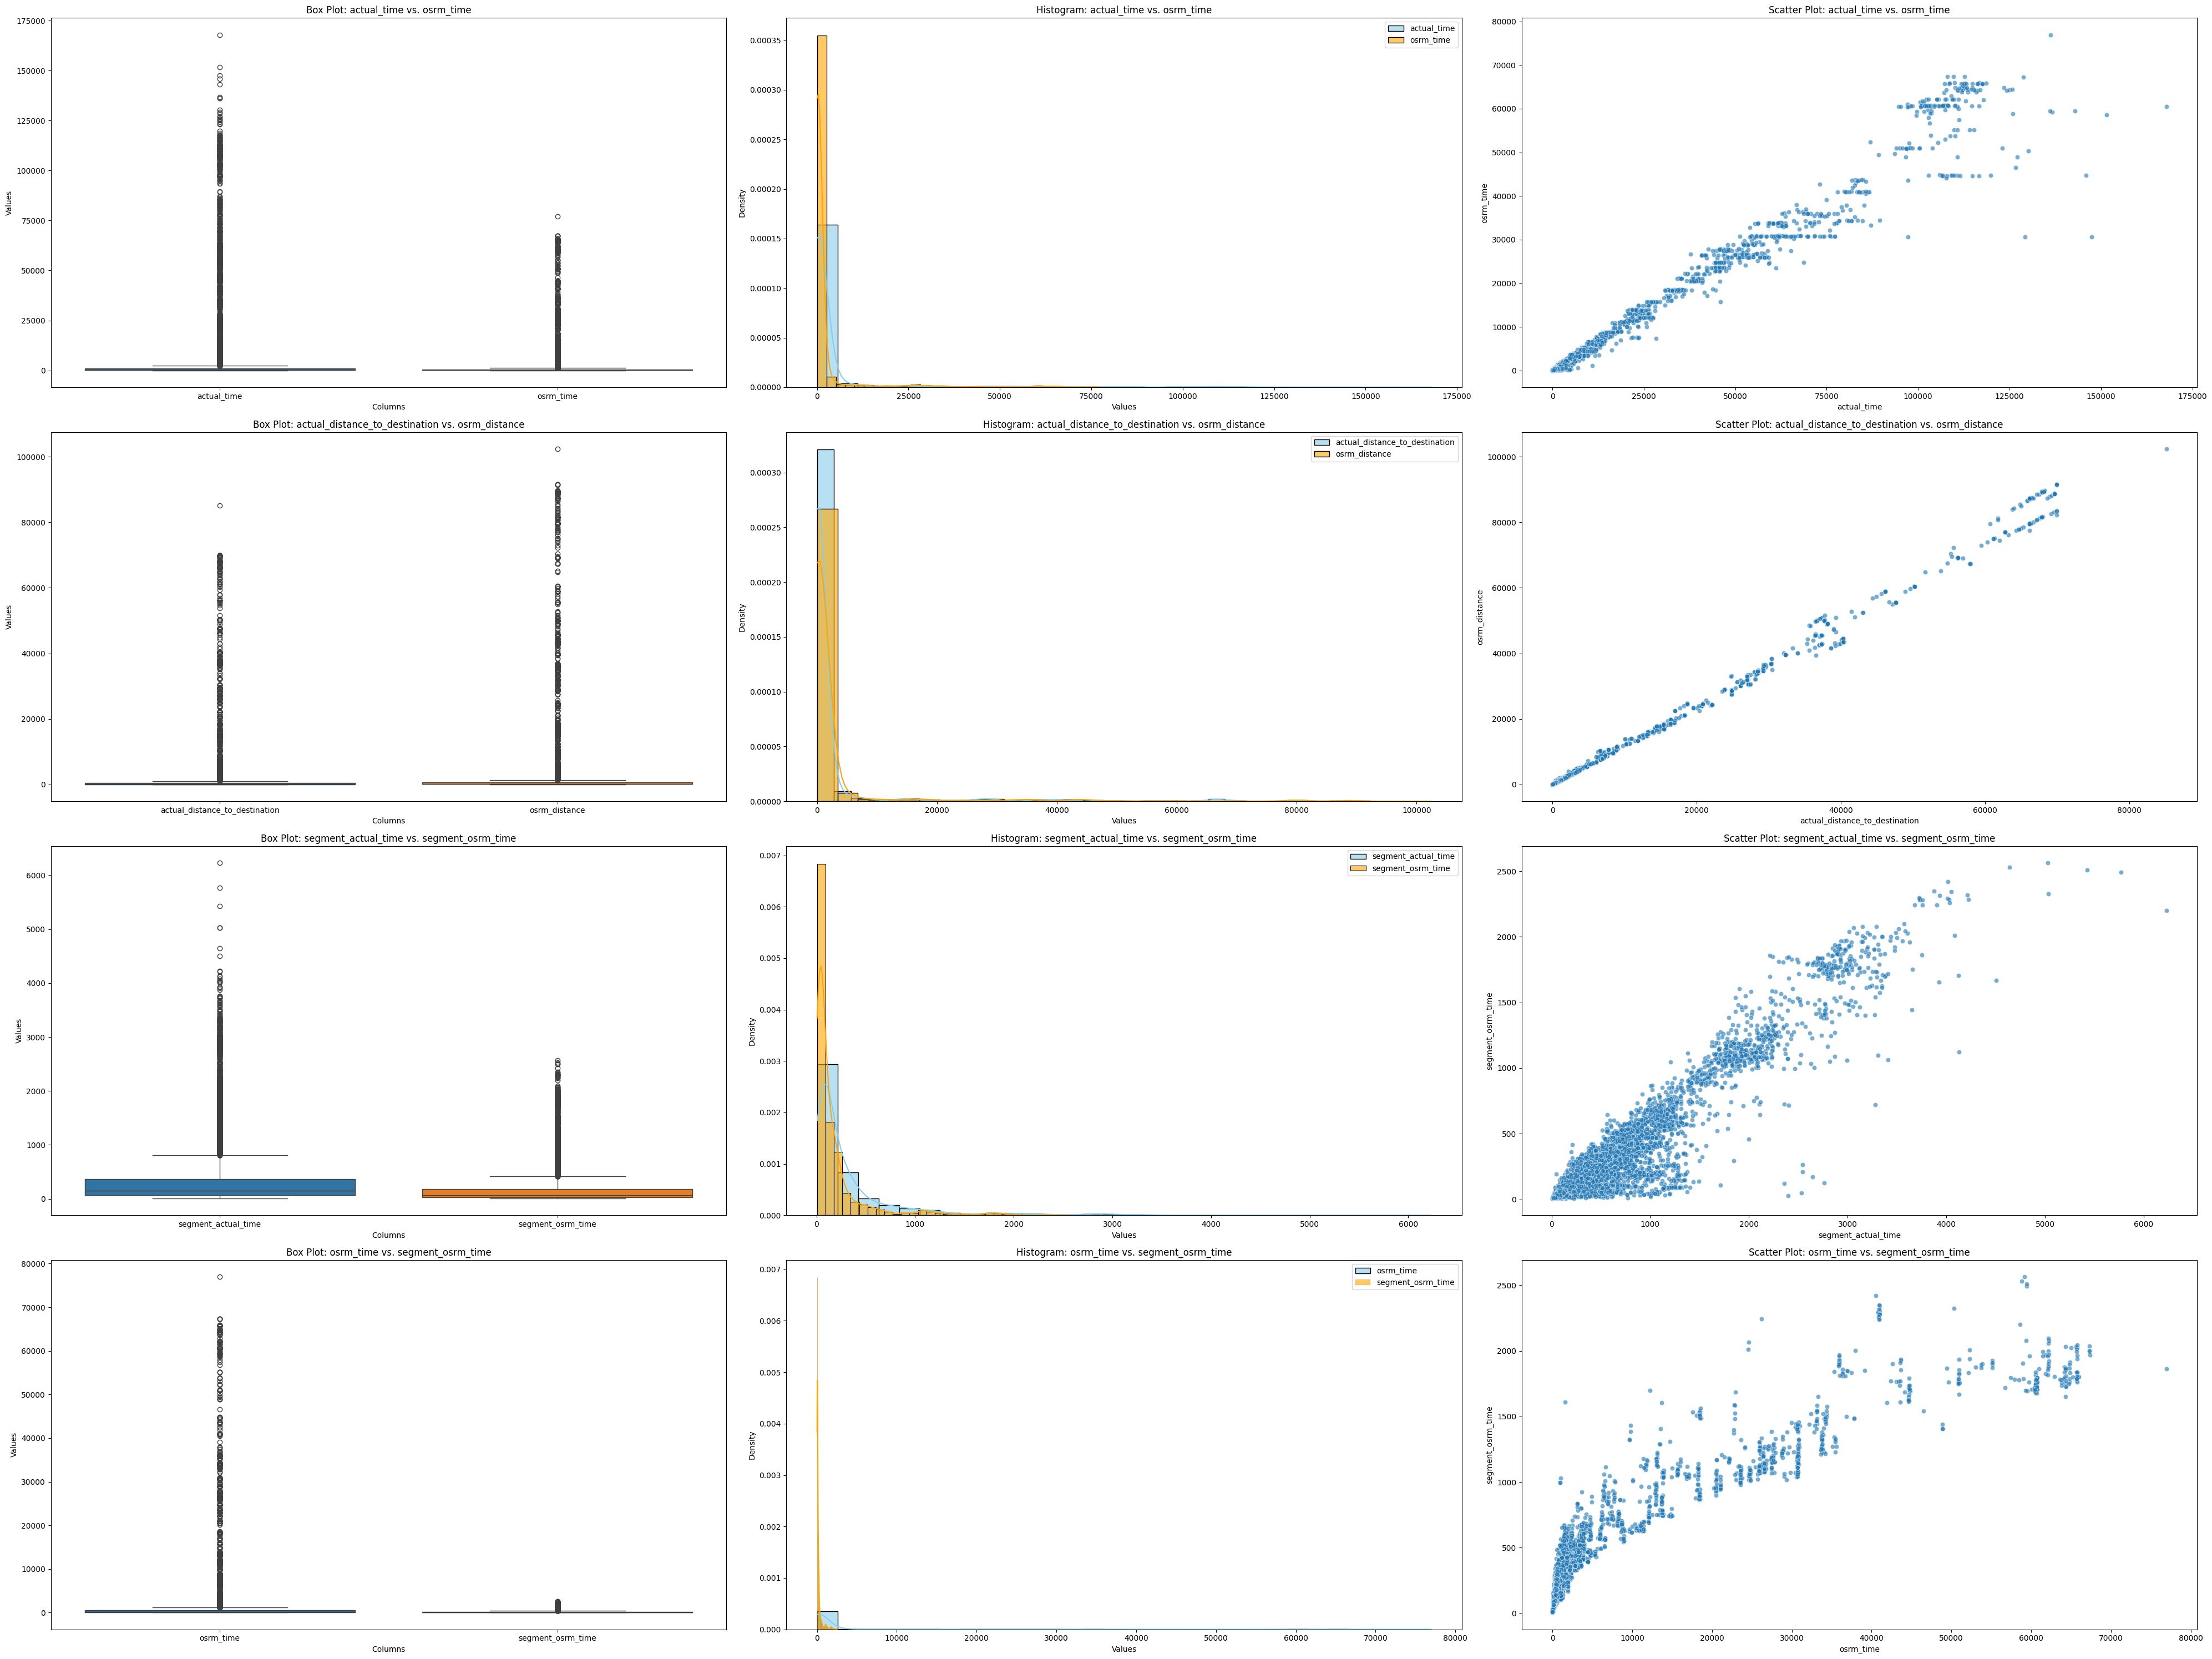

In [39]:
plt.figure(figsize=(40, 30))

for idx, (col1, col2) in enumerate(column_pairs, start=1):
    # Box Plot
    plt.subplot(4, 3, idx * 3 - 2)
    sns.boxplot(data=hypothesis_df[[col1, col2]])
    plt.title(f"Box Plot: {col1} vs. {col2}")
    plt.xlabel("Columns")
    plt.ylabel("Values")

    # Histogram
    plt.subplot(4, 3, idx * 3 - 1)
    sns.histplot(hypothesis_df[col1], color='skyblue', label=col1, kde=True, stat="density", bins=30, alpha=0.6)
    sns.histplot(hypothesis_df[col2], color='orange', label=col2, kde=True, stat="density", bins=30, alpha=0.6)
    plt.title(f"Histogram: {col1} vs. {col2}")
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.legend()

    # Scatter Plot
    plt.subplot(4, 3, idx * 3)
    sns.scatterplot(x=hypothesis_df[col1], y=hypothesis_df[col2], alpha=0.6)
    plt.title(f"Scatter Plot: {col1} vs. {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

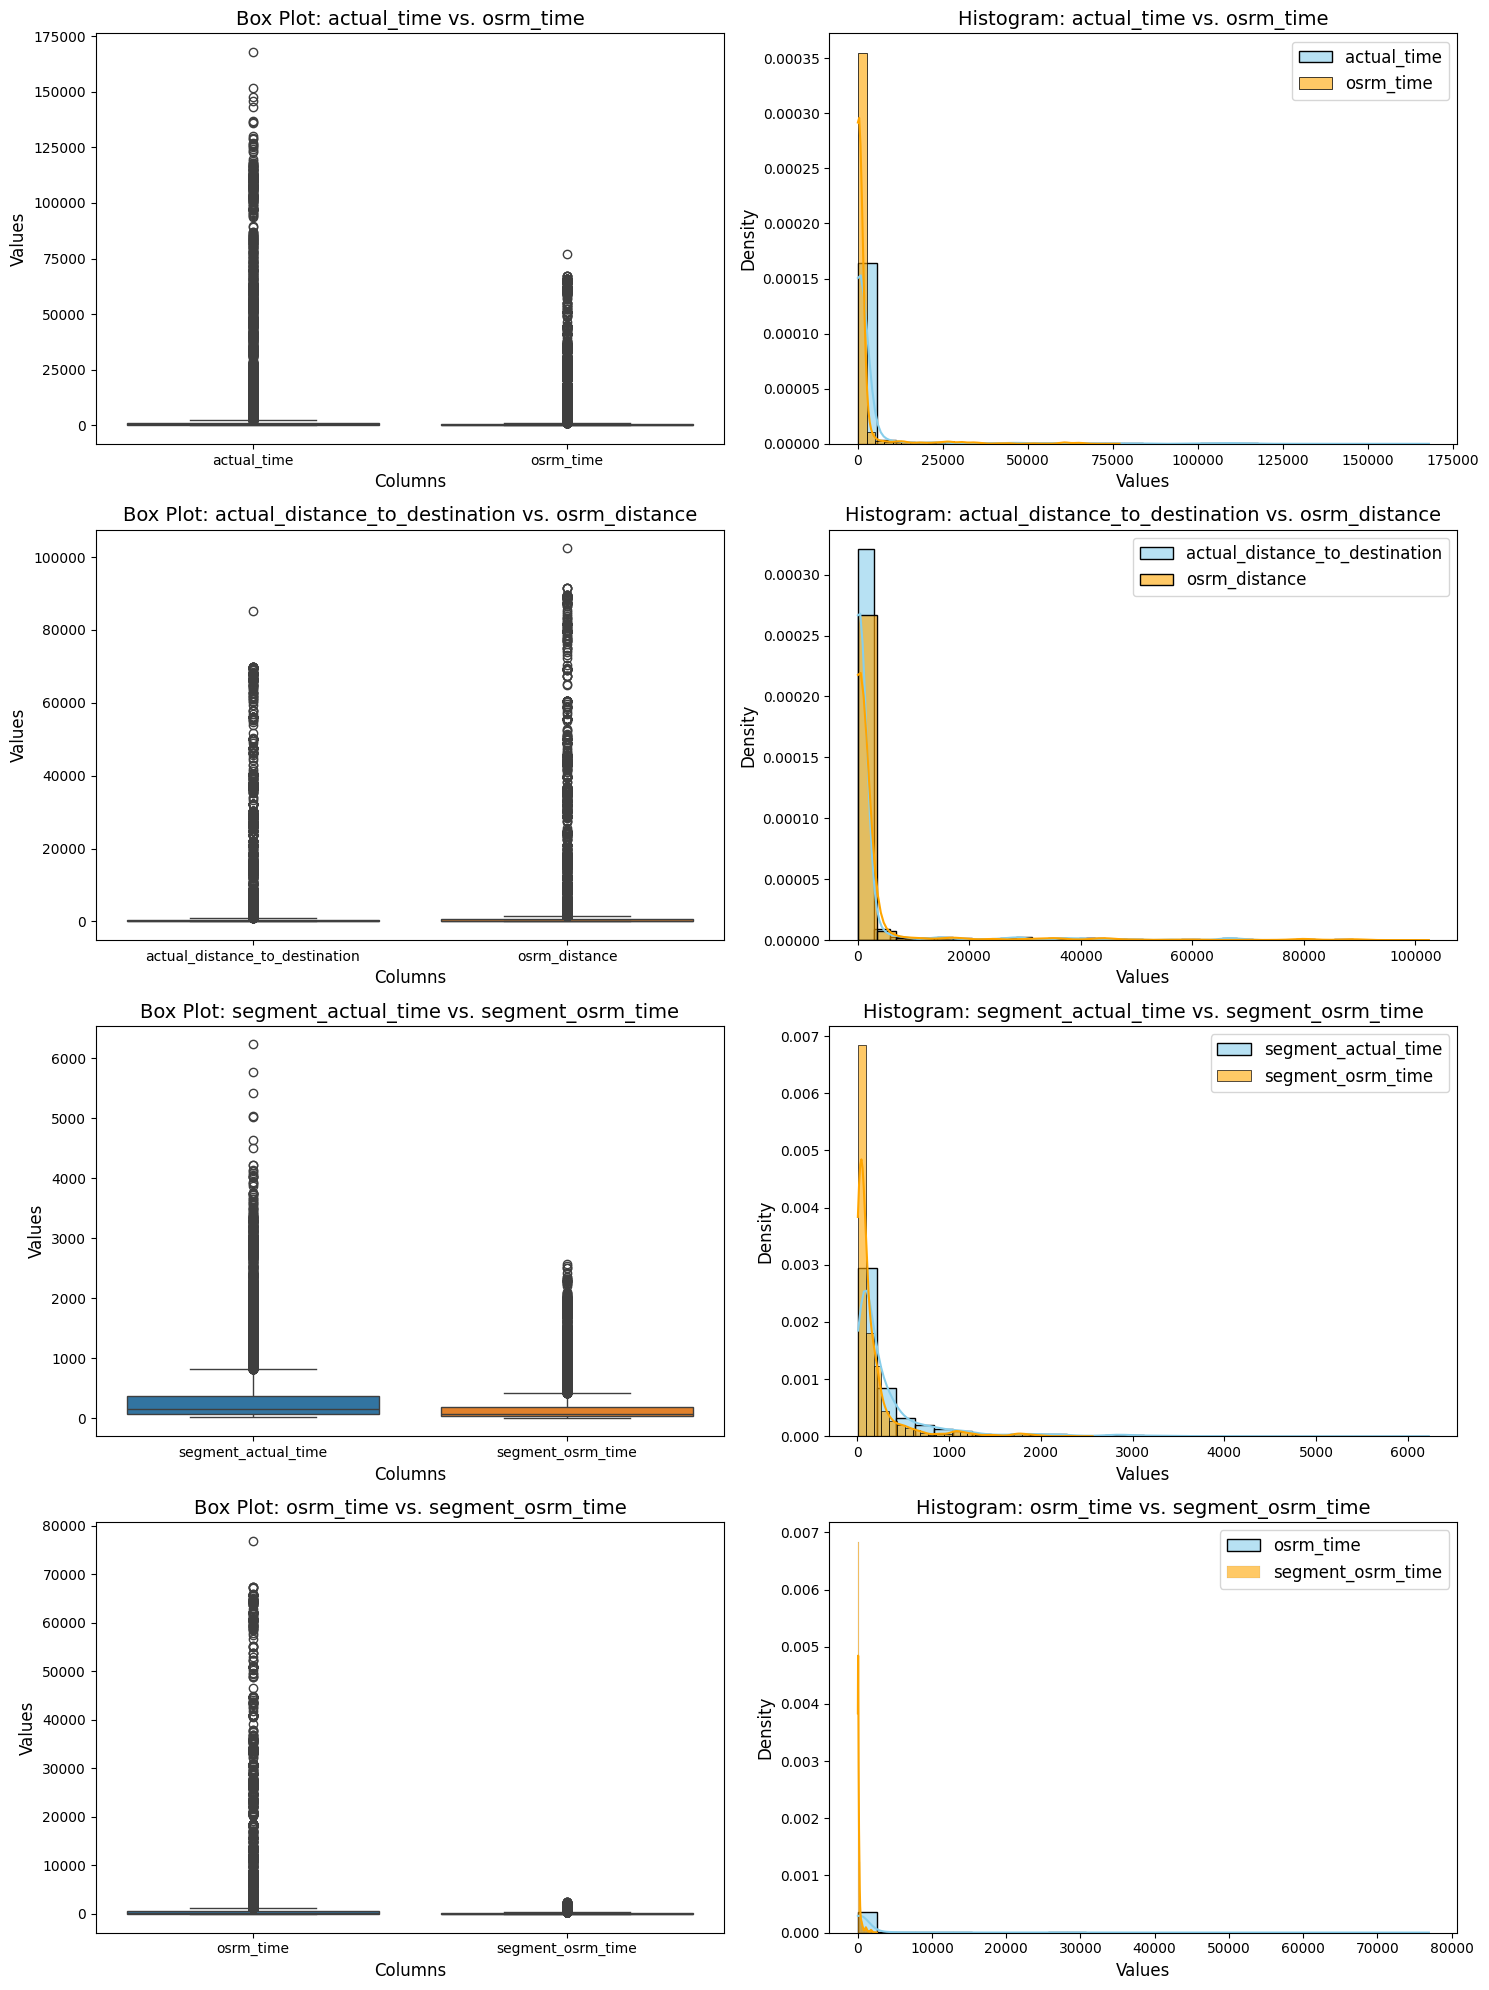

In [40]:
# Set the figure size for larger plots
plt.figure(figsize=(15, 20))  # Increase the size for better readability

# Iterate through the column pairs to generate visualizations
for idx, (col1, col2) in enumerate(column_pairs, start=1):
    # Box Plot
    plt.subplot(4, 2, idx * 2 - 1)
    sns.boxplot(data=hypothesis_df[[col1, col2]])
    plt.title(f"Box Plot: {col1} vs. {col2}", fontsize=14)
    plt.xlabel("Columns", fontsize=12)
    plt.ylabel("Values", fontsize=12)

    # Histogram
    plt.subplot(4, 2, idx * 2)
    sns.histplot(hypothesis_df[col1], color='skyblue', label=col1, kde=True, stat="density", bins=30, alpha=0.6)
    sns.histplot(hypothesis_df[col2], color='orange', label=col2, kde=True, stat="density", bins=30, alpha=0.6)
    plt.title(f"Histogram: {col1} vs. {col2}", fontsize=14)
    plt.xlabel("Values", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Key Observations:

1. Distribution of Metrics:

- Skewness: The histograms show that actual_time, osm_time, and segment_actual_time have right-skewed distributions, indicating a concentration of shorter durations.
- Outliers: The box plots reveal outliers in several metrics, especially actual_time and segment_actual_time, suggesting the presence of unusually long or short trips.

2. Relationship Between Actual and Estimated Values:

- Time: The scatter plots between actual_time and osm_time, as well as segment_actual_time and segment_osrm_time, show a general correlation, but with some scatter. This suggests that the estimated times are generally accurate but can deviate from the actual times.
- Distance: Similar observations can be made for the scatter plots between actual_distance_to_destination and osrm_distance, indicating a correlation but with some discrepancies.

3. Segment-Level Analysis:

- Distribution: The box plots for segment-level metrics show similar distributions to the overall metrics, suggesting that the segment-level data is representative of the overall trip data.
- Relationship: The scatter plot between segment_actual_time and segment_osrm_time reinforces the correlation observed at the trip level.

### Potential Insights:

1. Pricing Strategy: The skewed distributions of time metrics suggest that a pricing model with a higher base fare and lower per-unit charge for distance or time could be more equitable.
2. Route Optimization: The discrepancies between actual and estimated values indicate room for improvement in route optimization algorithms to account for real-world factors.
3. Traffic Management: Understanding the concentration of rides in certain time and distance ranges can help in traffic management and infrastructure planning.
4. Customer Satisfaction: Analyzing the distribution of ride durations and distances can help identify potential areas for improvement in terms of customer satisfaction.

## Checking for outliers in numerical columns

In [41]:
df.describe(include='float')

start_scan_to_end_scan  actual_distance_to_destination    actual_time  \
count           144316.000000                   144316.000000  144316.000000   
mean               963.697698                      234.708498     417.996237   
std               1038.082976                      345.480571     598.940065   
min                 20.000000                        9.000045       9.000000   
25%                161.000000                       23.352027      51.000000   
50%                451.000000                       66.135322     132.000000   
75%               1645.000000                      286.919294     516.000000   
max               7898.000000                     1927.447705    4532.000000   

           osrm_time  osrm_distance         factor  segment_actual_time  \
count  144316.000000  144316.000000  144316.000000        144316.000000   
mean      214.437055     285.549785       2.120178            36.175379   
std       308.448543     421.717826       1.717065            53.524298   
min         6.000000       9.008200       0.144000          -244.000000   
25%        27.000000      29.896250       1.604545            20.000000   
50%        64.000000      78.624400       1.857143            28.000000   
75%       259.000000     346.305400       2.212280            40.000000   
max      1686.000000    2326.199100      77.387097          3051.000000   

       segment_osrm_time  segment_osrm_distance  segment_factor  
count      144316.000000          144316.000000   144316.000000  
mean           18.495697              22.818993        2.218707  
std            14.774008              17.866367        4.854804  
min             0.000000               0.000000      -23.444444  
25%            11.000000              12.053975        1.347826  
50%            17.000000              23.508300        1.684211  
75%            22.000000              27.813325        2.250000  
max          1611.000000            2191.403700      574.250000

In [42]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time','osrm_time', 
            'osrm_distance', 'factor', 'segment_actual_time', 
            'segment_osrm_time', 'segment_osrm_distance']

outliers = dict()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    outliers.update({col: [Q1 - 1.5*IQR, Q3+1.5*IQR]})


outliers

{'start_scan_to_end_scan': [-2065.0, 3871.0],
 'actual_distance_to_destination': [-371.99887342249866, 682.2701940854843],
 'actual_time': [-646.5, 1213.5],
 'osrm_time': [-321.0, 607.0],
 'osrm_distance': [-444.71747500000004, 820.9191250000001],
 'factor': [0.6929431788810834, 3.1238825806527397],
 'segment_actual_time': [-10.0, 70.0],
 'segment_osrm_time': [-5.5, 38.5],
 'segment_osrm_distance': [-11.585050000000003, 51.45235000000001]}

In [43]:
for col in num_cols:
    if col in df.columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the upper bound
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the upper bound
        df[col] = df[col].apply(lambda x: min(x, upper_bound))
        
        print(f'Processed column: {col}')
    else:
        print(f'Column "{col}" not found in DataFrame')

Processed column: start_scan_to_end_scan
Processed column: actual_distance_to_destination
Processed column: actual_time
Processed column: osrm_time
Processed column: osrm_distance
Processed column: factor
Processed column: segment_actual_time
Processed column: segment_osrm_time
Processed column: segment_osrm_distance


In [44]:
df.describe(include='float')

start_scan_to_end_scan  actual_distance_to_destination    actual_time  \
count           144316.000000                   144316.000000  144316.000000   
mean               962.614880                      191.749624     346.111315   
std               1034.738789                      235.726501     409.619521   
min                 20.000000                        9.000045       9.000000   
25%                161.000000                       23.352027      51.000000   
50%                451.000000                       66.135322     132.000000   
75%               1645.000000                      286.919294     516.000000   
max               3871.000000                      682.270194    1213.500000   

           osrm_time  osrm_distance         factor  segment_actual_time  \
count  144316.000000  144316.000000  144316.000000         144316.00000   
mean      175.434193     231.906075       1.951724             31.39920   
std       207.525265     282.950816       0.540185             17.40648   
min         6.000000       9.008200       0.144000           -244.00000   
25%        27.000000      29.896250       1.604545             20.00000   
50%        64.000000      78.624400       1.857143             28.00000   
75%       259.000000     346.305400       2.212280             40.00000   
max       607.000000     820.919125       3.123883             70.00000   

       segment_osrm_time  segment_osrm_distance  segment_factor  
count      144316.000000          144316.000000   144316.000000  
mean           17.507601              21.993586        2.218707  
std             8.966561              11.327201        4.854804  
min             0.000000               0.000000      -23.444444  
25%            11.000000              12.053975        1.347826  
50%            17.000000              23.508300        1.684211  
75%            22.000000              27.813325        2.250000  
max            38.500000              51.452350      574.250000

### OHE for categorical feature

In [45]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_data = ohe.fit_transform(X=df[cat_col])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out(cat_col))

# Reset index to match with the original dataframe index
encoded_df.index = df.index

# Drop the original categorical columns and concatenate the new one-hot encoded columns
df = df.drop(cat_col, axis=1).join(encoded_df)

## Standardize the numerical features using StandardScaler

In [46]:
num_cols = ['actual_distance_to_destination', 'actual_time','osrm_time', 
            'osrm_distance', 'factor', 'segment_actual_time', 
            'segment_osrm_time', 'segment_osrm_distance']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns and transform them
df[num_cols] = scaler.fit_transform(df[num_cols])

# If we were have to train a model then we have to use VIF to find multi-collinearity for each numerical columns.

In [47]:
def check_multicollinearity(df, num_cols):    
    # Filter the dataframe for the numerical columns
    df_num = df[num_cols].select_dtypes(include=['float64', 'int32', 'int64'])
    
    # Add a constant (intercept term)
    X = add_constant(df_num)
    # List to store columns with acceptable VIF (<6)
    cols_to_be_kept = []
    
    # Calculate VIF for each column
    for i in range(X.shape[1]):
        vif = variance_inflation_factor(X.values, i)
        
        # If VIF is below 6, append the column name (excluding the constant)
        if vif < 6:
            if X.columns[i] != 'const':
                cols_to_be_kept.append(X.columns[i])
    
    return cols_to_be_kept

# Example usage:

kept_columns = check_multicollinearity(df, df.columns)
print("Columns kept after VIF check:", kept_columns)


Columns kept after VIF check: ['start_scan_to_end_scan', 'factor', 'segment_actual_time', 'segment_factor', 'data_training', 'route_type_FTL', 'is_cutoff_True']


# Final Conclusion



**Key Observations:**
1. **Event Trends**: High event counts initially, with fluctuations and a significant drop around October 10, 2018, may suggest seasonal patterns or external factors affecting events.
2. **Distance and Time Distributions**: Actual and estimated distances show right-skewed distributions, with longer trips being less common. Times are concentrated in shorter durations, with discrepancies between actual and estimated values indicating potential inaccuracies in estimation models.
3. **Route and Network Analysis**: Gurgaon-Bilaspur routes are most frequent. Significant average travel times for long distances suggest inefficiencies. Key warehouses in northern and southern India highlight a hub-and-spoke model.
4. **Daily and Hourly Patterns**: Higher ride volumes on weekdays with consistent weekend demand. Seasonal and hourly variations suggest potential for dynamic pricing and optimized fleet management.

**Potential Insights:**
1. **Pricing and Fleet Management**: Adjust pricing models and fleet distribution based on observed patterns.
2. **Route Optimization**: Improve algorithms to reduce discrepancies between actual and estimated times and distances.
3. **Network Optimization**: Enhance warehouse capacities and focus on regional expansion based on key hubs and routes.